# Table of Contents

- [Data Preparation](#data-preparation)
  - [Importing Libraries](#importing-libraries)
  - [Defining Sturges Function](#defining-sturges-function)
  - [Loading Data](#loading-data)
  - [Data Preprocessing](#data-preprocessing)
- [General Statistics](#general-statistics)
  - [Histograms of Datasets](#histograms-of-datasets)
  - [Empirical Cumulative Distribution Functions of Datasets](#empirical-cumulative-distribution-functions-of-dataSets)
  - [Boxplots of Datasets](#boxplots-of-datasets)
  - [Means of Datasets](#means-of-datasets)
  - [Variances of Datasets](#variances-of-datasets)
  - [Standard Deviations of Datasets](#standard-deviations-of-datasets)
- [Statistics per Time](#statistics-per-time)
  - [Converting Datetime to Hour](#converting-datetime-to-hour)
  - [Boxplots of Datasets per Hour](#boxplots-of-smart-tv-datasets-per-bour)
  - [Means of Datasets per Hour](#means-of-datasets-per-hour)
  - [Variances of Datasets per Hour](#variances-of-datasets-per-hour)
  - [Standard Deviations of Datasets per Hour](#standard-deviations-of-datasets-per-hour)
- [Peak Traffic Hours](#peak-traffic-hours)
  - [Choosing the 8 datasets](#choosing-the-8-datasets)
  - [Histograms of 8 Datasets](#histograms-of-8-datasets)
  - [MLE Gaussian](#mle-gaussian)
  - [MLE Gamma](#mle-gamma)
  - [Curves of Datasets](#curves-of-datasets)
  - [Probability Plots of Datasets](#probability-plots-of-datasets)
- [Correlation Stats in Peak Traffic Hours](#correlation-Stats-in-peak-traffic-hours)
  - [Correlation of Datasets](#correlation-of-datasets)
  - [Scatter Plots of Datasets](#scatter-plots-of-datasets)
- [Comparation between Devices](#comparation-between-devices)
- [Conclusion](#conclusion)


# Data Preparation

## Importing Libraries

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF


## Defining Sturges Function

In [2]:
def get_sturges_bins(data: pd.Series) -> int:
    """
    Calculates the number of bins for a histogram using Sturges' rule.

    Args:
        data: A pandas Series representing the data for which the number of bins is to be calculated.

    Returns:
        An integer representing the optimal number of bins for a histogram.
    """
    num_bins = int(1 + 3.3 * np.log10(len(data)))
    return num_bins


## Loading data

In [3]:
df_smart_tv = pd.read_csv('./csv/smart-tv-dataset.csv')
df_chromecast = pd.read_csv('./csv/chromecast-dataset.csv')

df_smart_tv, df_chromecast


(         device_id            date_hour       bytes_up    bytes_down
 0         77209603  2021-11-22 15:23:00  132932.983607  2.818140e+06
 1         77209603  2021-11-22 15:24:00  115770.491803  2.264410e+06
 2         77209603  2021-11-22 15:25:00  114030.032787  2.309270e+06
 3         77209603  2021-11-22 15:26:00   97170.622951  2.006544e+06
 4         77209603  2021-11-22 15:27:00   39569.573770  8.061440e+05
 ...            ...                  ...            ...           ...
 4417898   40241962  2021-11-25 23:19:00       8.000000  8.000000e+00
 4417899   40241962  2021-11-25 23:21:00       8.000000  8.000000e+00
 4417900   40241962  2021-11-25 23:23:00       8.000000  8.000000e+00
 4417901   40241962  2021-11-25 23:25:00       8.000000  8.000000e+00
 4417902   40241962  2021-11-25 23:26:00       8.000000  3.200000e+01
 
 [4417903 rows x 4 columns],
          device_id            date_hour     bytes_up    bytes_down
 0         66161985  2021-09-06 00:01:00  2987.016393  49185.

## Data Preprocessing

In [4]:
df_smart_tv[['bytes_up', 'bytes_down']] += 1
df_smart_tv[['bytes_up', 'bytes_down']] = np.log10(
    df_smart_tv[['bytes_up', 'bytes_down']])

df_chromecast[['bytes_up', 'bytes_down']] += 1
df_chromecast[['bytes_up', 'bytes_down']] = np.log10(
    df_chromecast[['bytes_up', 'bytes_down']])

df_smart_tv, df_chromecast


(         device_id            date_hour  bytes_up  bytes_down
 0         77209603  2021-11-22 15:23:00  5.123636    6.449963
 1         77209603  2021-11-22 15:24:00  5.063602    6.354955
 2         77209603  2021-11-22 15:25:00  5.057023    6.363475
 3         77209603  2021-11-22 15:26:00  4.987539    6.302449
 4         77209603  2021-11-22 15:27:00  4.597372    5.906413
 ...            ...                  ...       ...         ...
 4417898   40241962  2021-11-25 23:19:00  0.954243    0.954243
 4417899   40241962  2021-11-25 23:21:00  0.954243    0.954243
 4417900   40241962  2021-11-25 23:23:00  0.954243    0.954243
 4417901   40241962  2021-11-25 23:25:00  0.954243    0.954243
 4417902   40241962  2021-11-25 23:26:00  0.954243    1.518514
 
 [4417903 rows x 4 columns],
          device_id            date_hour  bytes_up  bytes_down
 0         66161985  2021-09-06 00:01:00  3.475383    4.691848
 1         66161985  2021-09-06 00:02:00  2.836916    2.517536
 2         66161985  202

# General Statistics

## Histograms of Datasets

In [5]:
def plot_histogram(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Plots a histogram of the given data on the given axis.

    Args:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    bins = get_sturges_bins(data)
    ax.hist(data, bins=bins)
    ax.set_title(title)
    ax.set_xlabel('log10(Bytes)')
    ax.set_ylabel('Frequência')

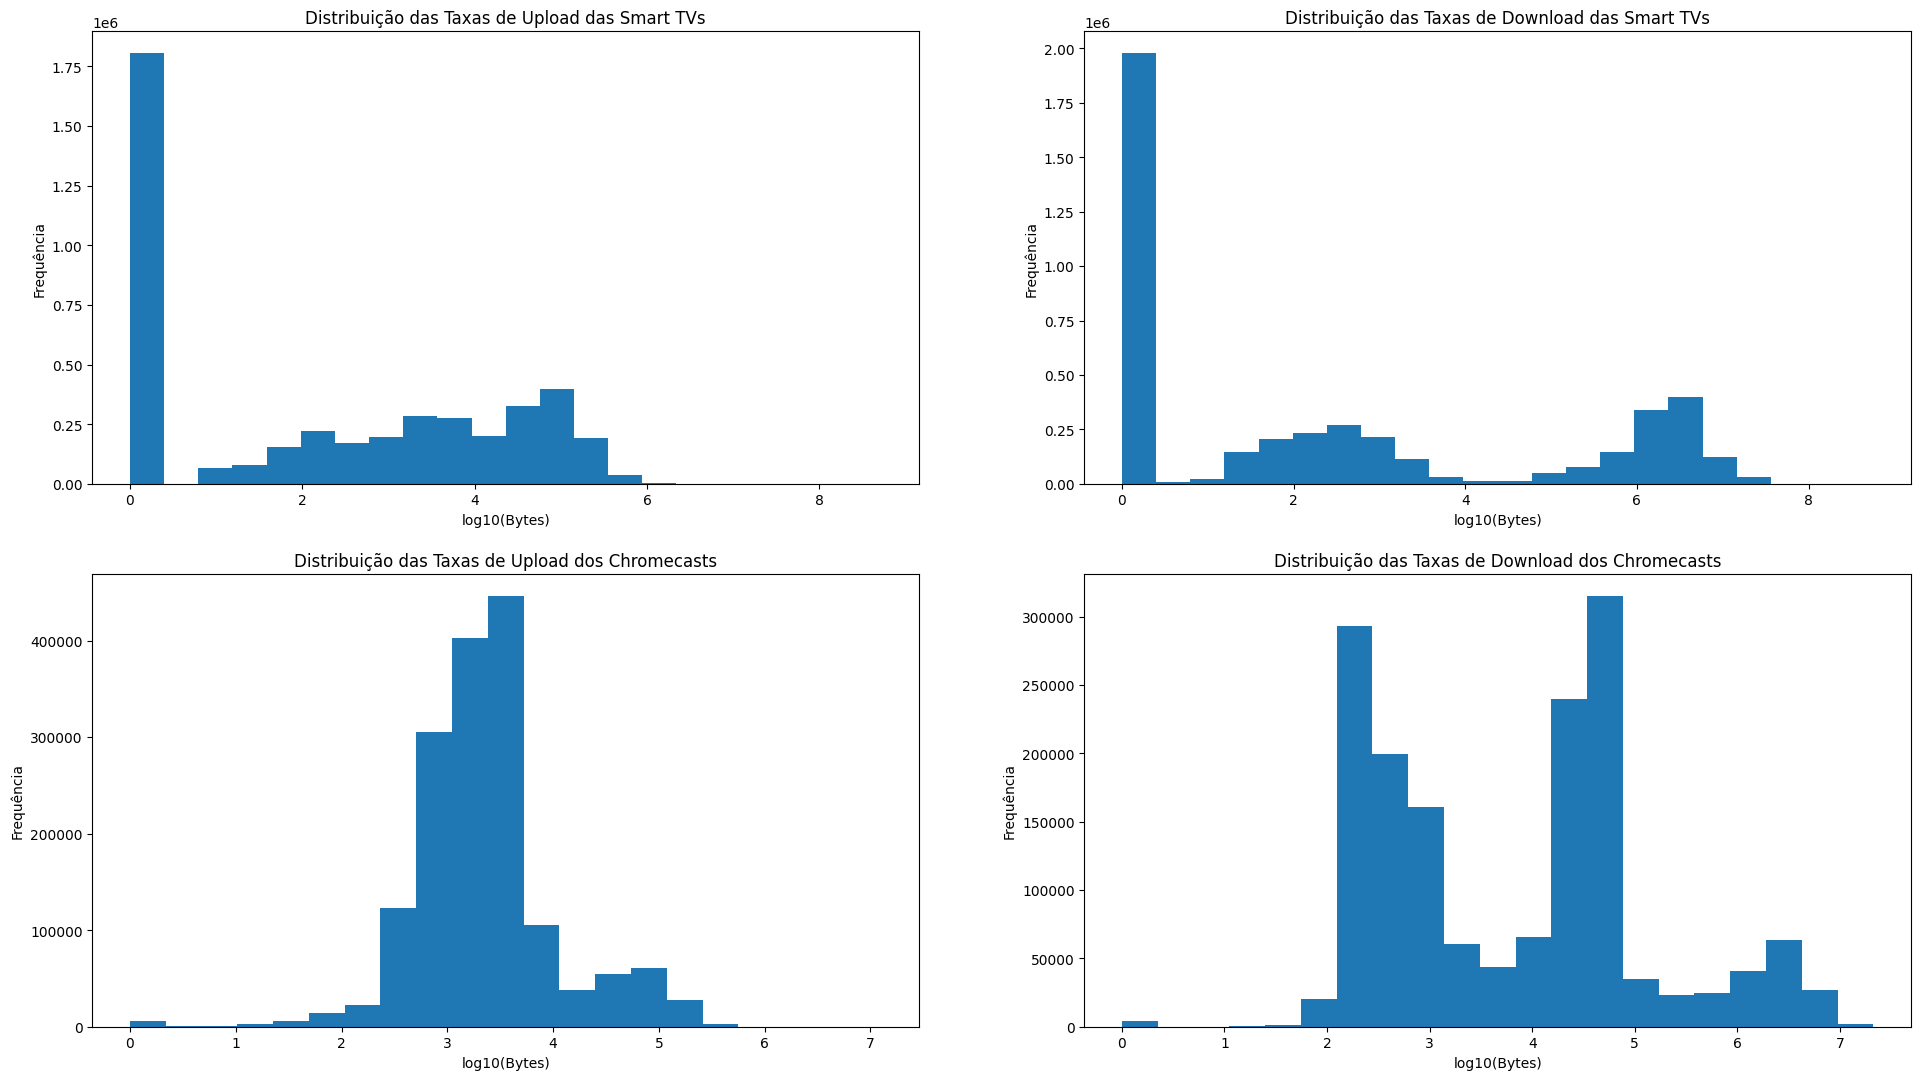

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_histogram(ax[0][0], df_smart_tv['bytes_up'],
               'Distribuição das Taxas de Upload das Smart TVs')
plot_histogram(ax[0][1], df_smart_tv['bytes_down'],
               'Distribuição das Taxas de Download das Smart TVs')
plot_histogram(ax[1][0], df_chromecast['bytes_up'],
               'Distribuição das Taxas de Upload dos Chromecasts')
plot_histogram(ax[1][1], df_chromecast['bytes_down'],
               'Distribuição das Taxas de Download dos Chromecasts')

plt.show()


## Empirical Cumulative Distribution Functions of Datasets

In [7]:
def plot_ecdf(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Creates a plot with the empirical cumulative distribution function (ECDF) of the given data.

    Parameters:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    ecdf = ECDF(data)
    ax.plot(ecdf.x, ecdf.y)
    ax.set_title(title)
    ax.set_xlabel('log10(Bytes)')
    ax.set_ylabel('Probabilidade Acumulada')

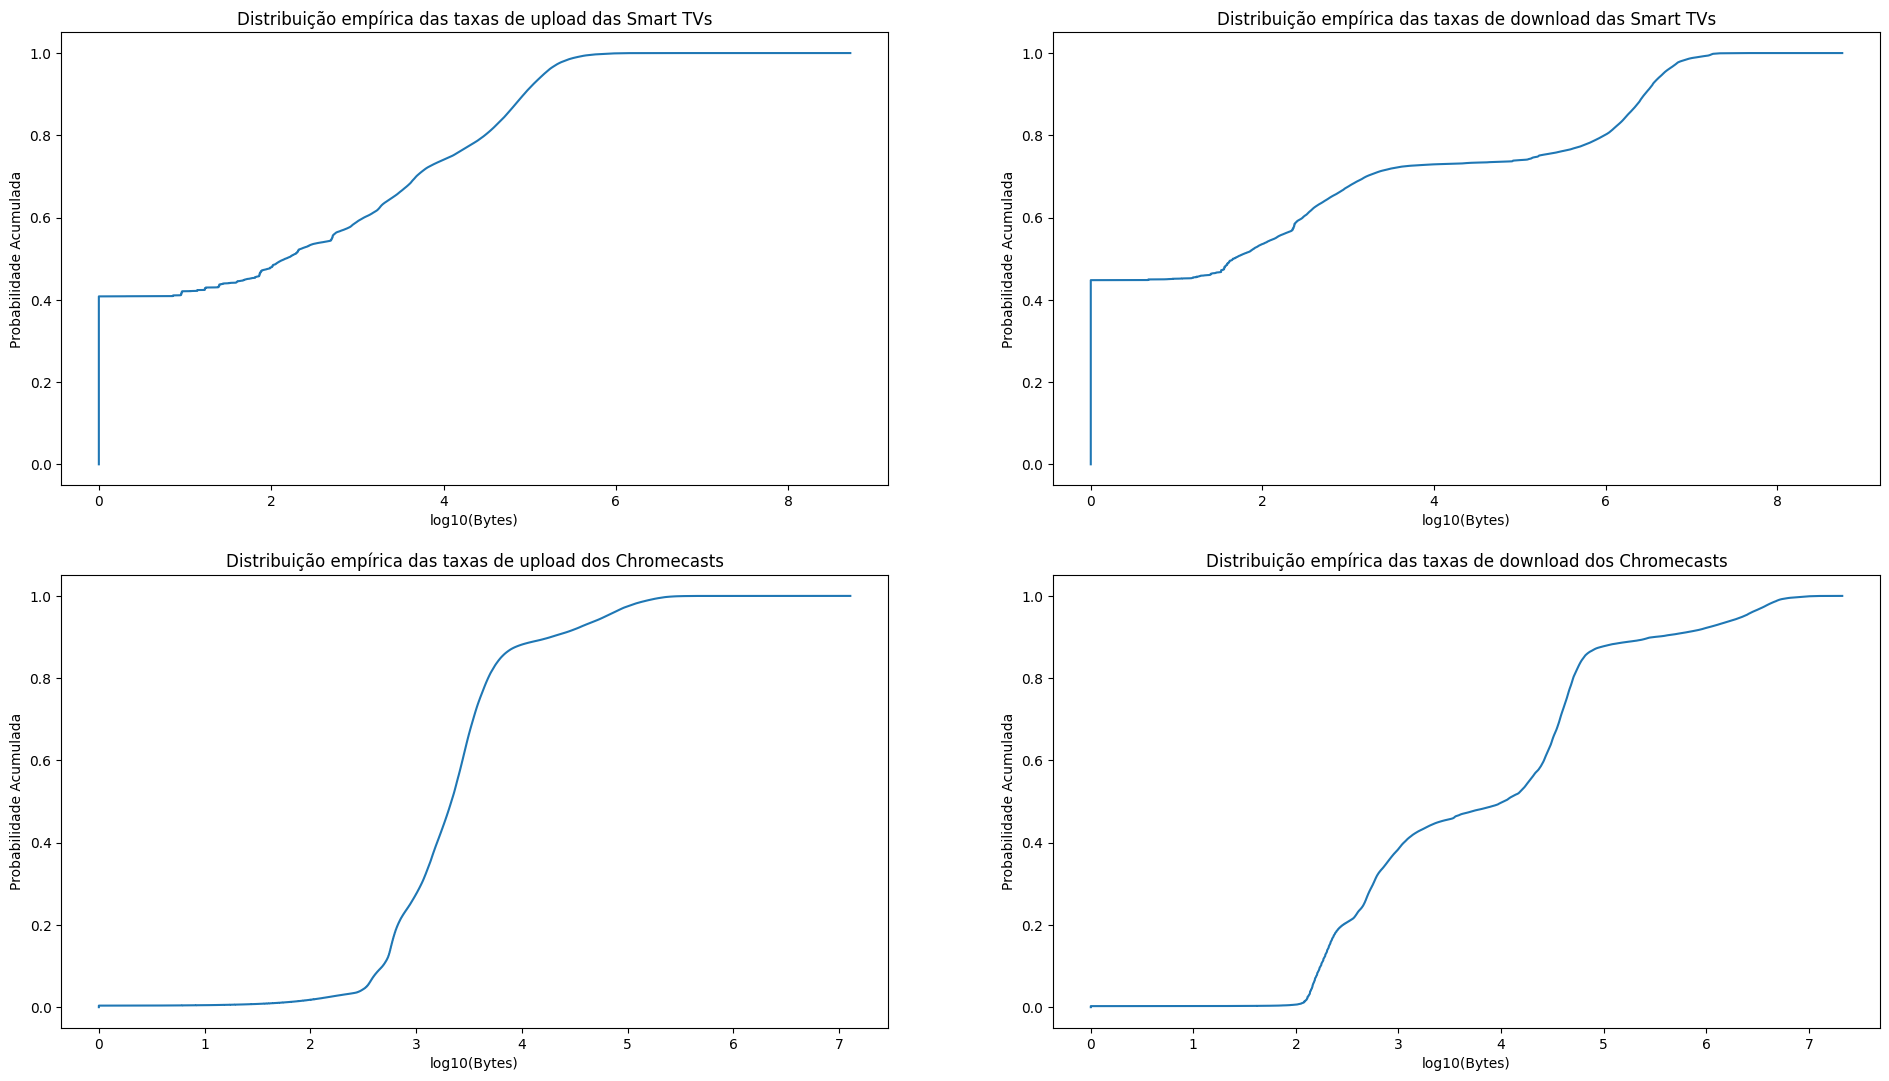

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_ecdf(ax[0][0], df_smart_tv['bytes_up'],
          'Distribuição empírica das taxas de upload das Smart TVs')
plot_ecdf(ax[0][1], df_smart_tv['bytes_down'],
          'Distribuição empírica das taxas de download das Smart TVs')
plot_ecdf(ax[1][0], df_chromecast['bytes_up'],
          'Distribuição empírica das taxas de upload dos Chromecasts')
plot_ecdf(ax[1][1], df_chromecast['bytes_down'],
          'Distribuição empírica das taxas de download dos Chromecasts')

plt.show()


## Boxplots of Datasets

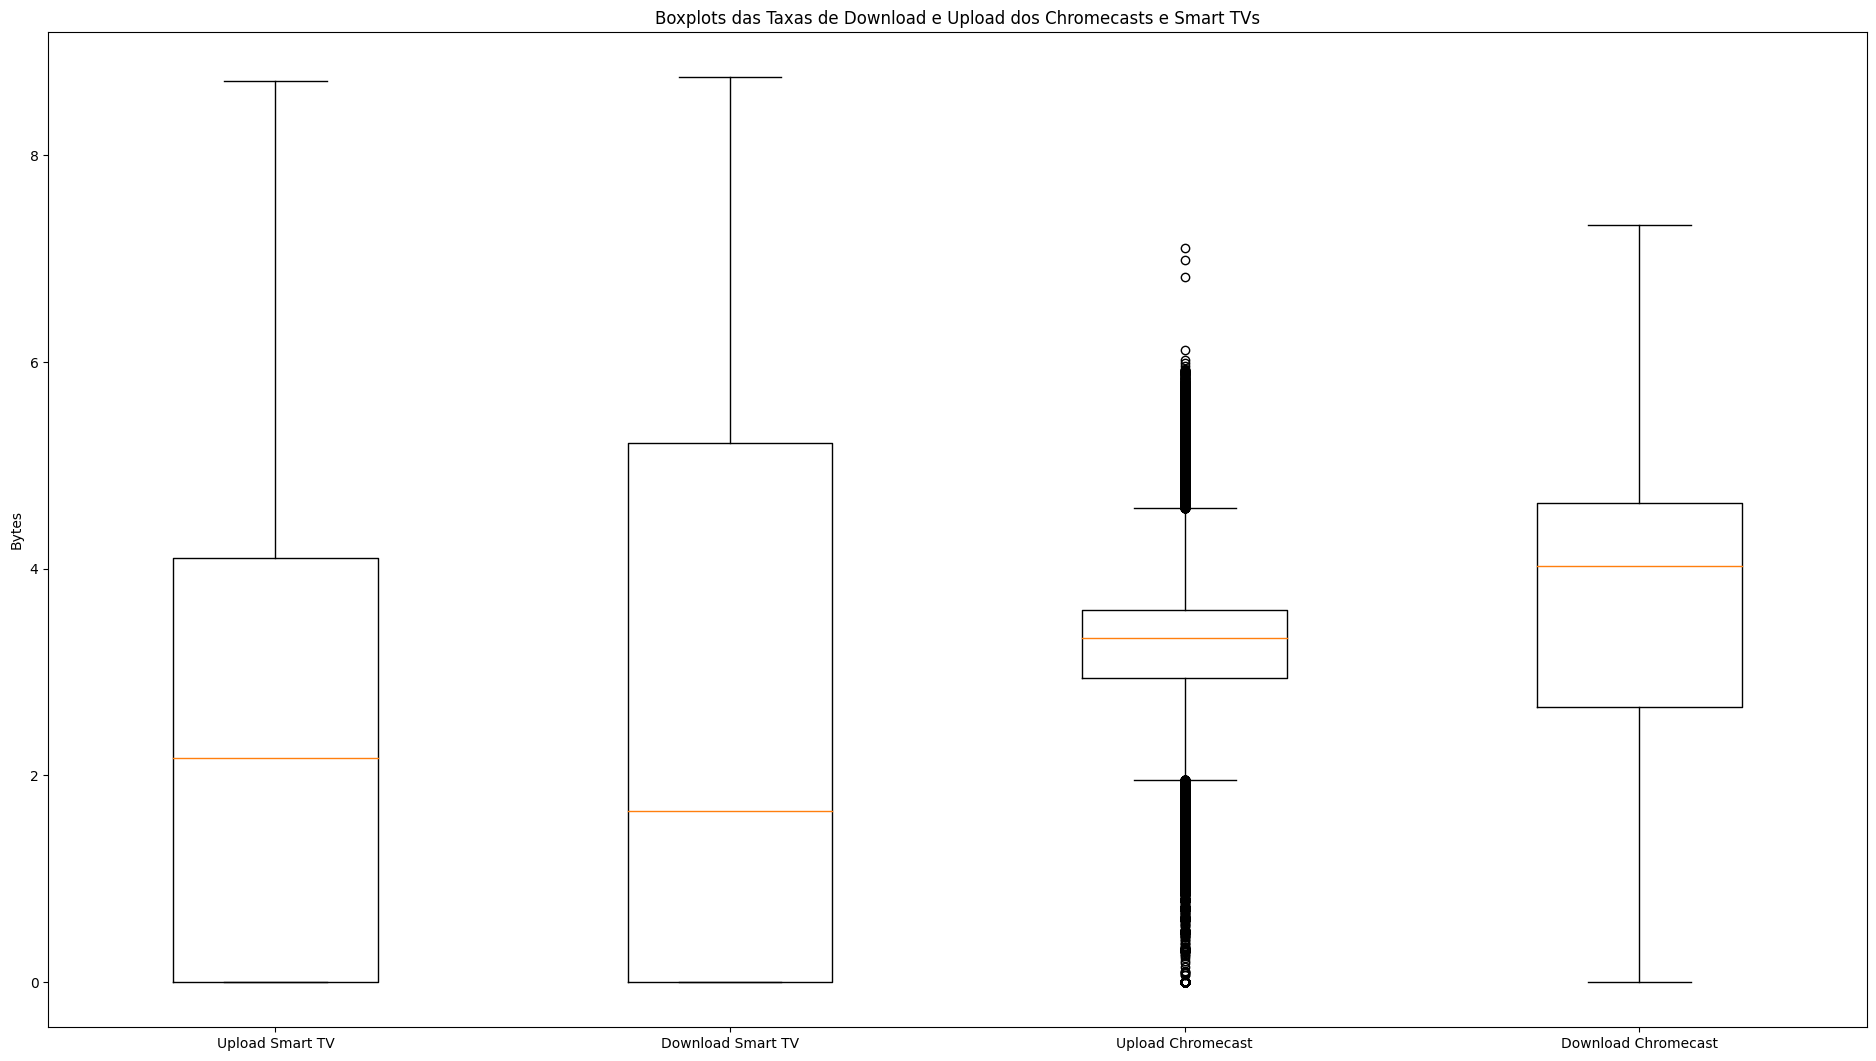

In [9]:
fig, ax = plt.subplots(figsize=(23.465, 12.925))

ax.set_title(
    'Boxplots das Taxas de Download e Upload dos Chromecasts e Smart TVs')
ax.boxplot([df_smart_tv['bytes_up'], df_smart_tv['bytes_down'],
           df_chromecast['bytes_up'], df_chromecast['bytes_down']])
ax.set_xticklabels(['Upload Smart TV', 'Download Smart TV',
                   'Upload Chromecast', 'Download Chromecast'])
ax.set_ylabel('Bytes')

plt.show()


## Means of Datasets

In [10]:
means = {
    'smart_tv_up': np.mean(df_smart_tv['bytes_up']),
    'smart_tv_down': np.mean(df_smart_tv['bytes_down']),
    'chromecast_up': np.mean(df_chromecast['bytes_up']),
    'chromecast_down': np.mean(df_chromecast['bytes_down'])
}

means


{'smart_tv_up': 2.158288206507635,
 'smart_tv_down': 2.351678620482737,
 'chromecast_up': 3.3502996618084153,
 'chromecast_down': 3.800045706037558}

## Variances of Datasets

In [11]:
vars = {
    'smart_tv_up': np.var(df_smart_tv['bytes_up']),
    'smart_tv_down': np.var(df_smart_tv['bytes_down']),
    'chromecast_up': np.var(df_chromecast['bytes_up']),
    'chromecast_down': np.var(df_chromecast['bytes_down'])
}

vars

{'smart_tv_up': 4.110138414147299,
 'smart_tv_down': 6.721322376032034,
 'chromecast_up': 0.45996836246102296,
 'chromecast_down': 1.663894572605984}

## Standard Deviations of Datasets

In [12]:
stds = {
    'smart_tv_up': np.std(df_smart_tv['bytes_up']),
    'smart_tv_down': np.std(df_smart_tv['bytes_down']),
    'chromecast_up': np.std(df_chromecast['bytes_up']),
    'chromecast_down': np.std(df_chromecast['bytes_down'])
}

stds

{'smart_tv_up': 2.0273476303158517,
 'smart_tv_down': 2.5925513256311885,
 'chromecast_up': 0.6782096744083078,
 'chromecast_down': 1.2899203745216152}

# Statistics per time

### Converting Datetime to Hour

In [13]:
def convert_date_hour(df):
    df['date_hour'] = [datetime.strptime(
        x, '%Y-%m-%d %H:%M:%S').hour for x in df['date_hour']]

In [14]:
convert_date_hour(df_smart_tv)
convert_date_hour(df_chromecast)

df_smart_tv, df_chromecast


(         device_id  date_hour  bytes_up  bytes_down
 0         77209603         15  5.123636    6.449963
 1         77209603         15  5.063602    6.354955
 2         77209603         15  5.057023    6.363475
 3         77209603         15  4.987539    6.302449
 4         77209603         15  4.597372    5.906413
 ...            ...        ...       ...         ...
 4417898   40241962         23  0.954243    0.954243
 4417899   40241962         23  0.954243    0.954243
 4417900   40241962         23  0.954243    0.954243
 4417901   40241962         23  0.954243    0.954243
 4417902   40241962         23  0.954243    1.518514
 
 [4417903 rows x 4 columns],
          device_id  date_hour  bytes_up  bytes_down
 0         66161985          0  3.475383    4.691848
 1         66161985          0  2.836916    2.517536
 2         66161985          0  3.652720    4.578812
 3         66161985          0  2.890496    2.362105
 4         66161985          0  3.488877    4.713136
 ...           

## Boxplots of Datasets per Hour

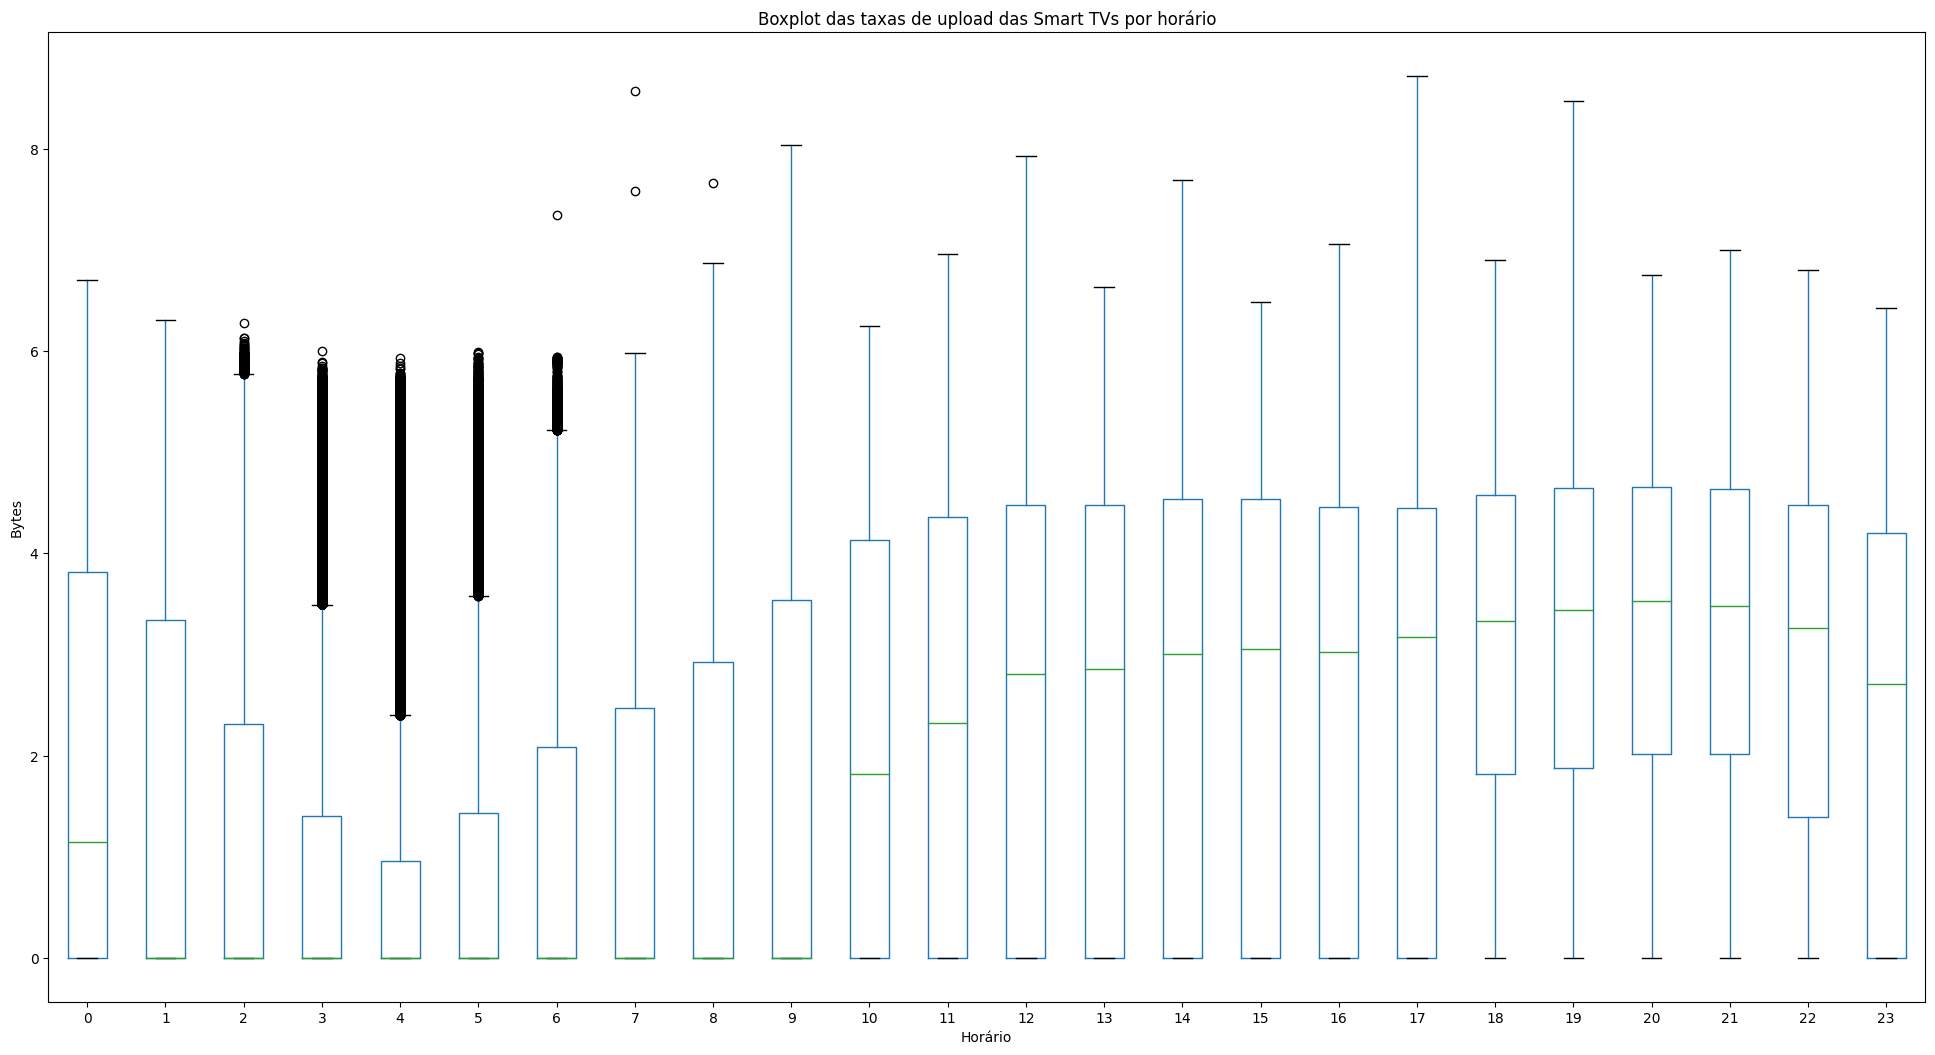

In [15]:
df_smart_tv.boxplot(column='bytes_up', by='date_hour',
                    figsize=(23.465, 12.925), grid=False)
plt.title('Boxplot das taxas de upload das Smart TVs por horário')
plt.suptitle('')
plt.xlabel('Horário')
plt.ylabel('Bytes')
plt.show()


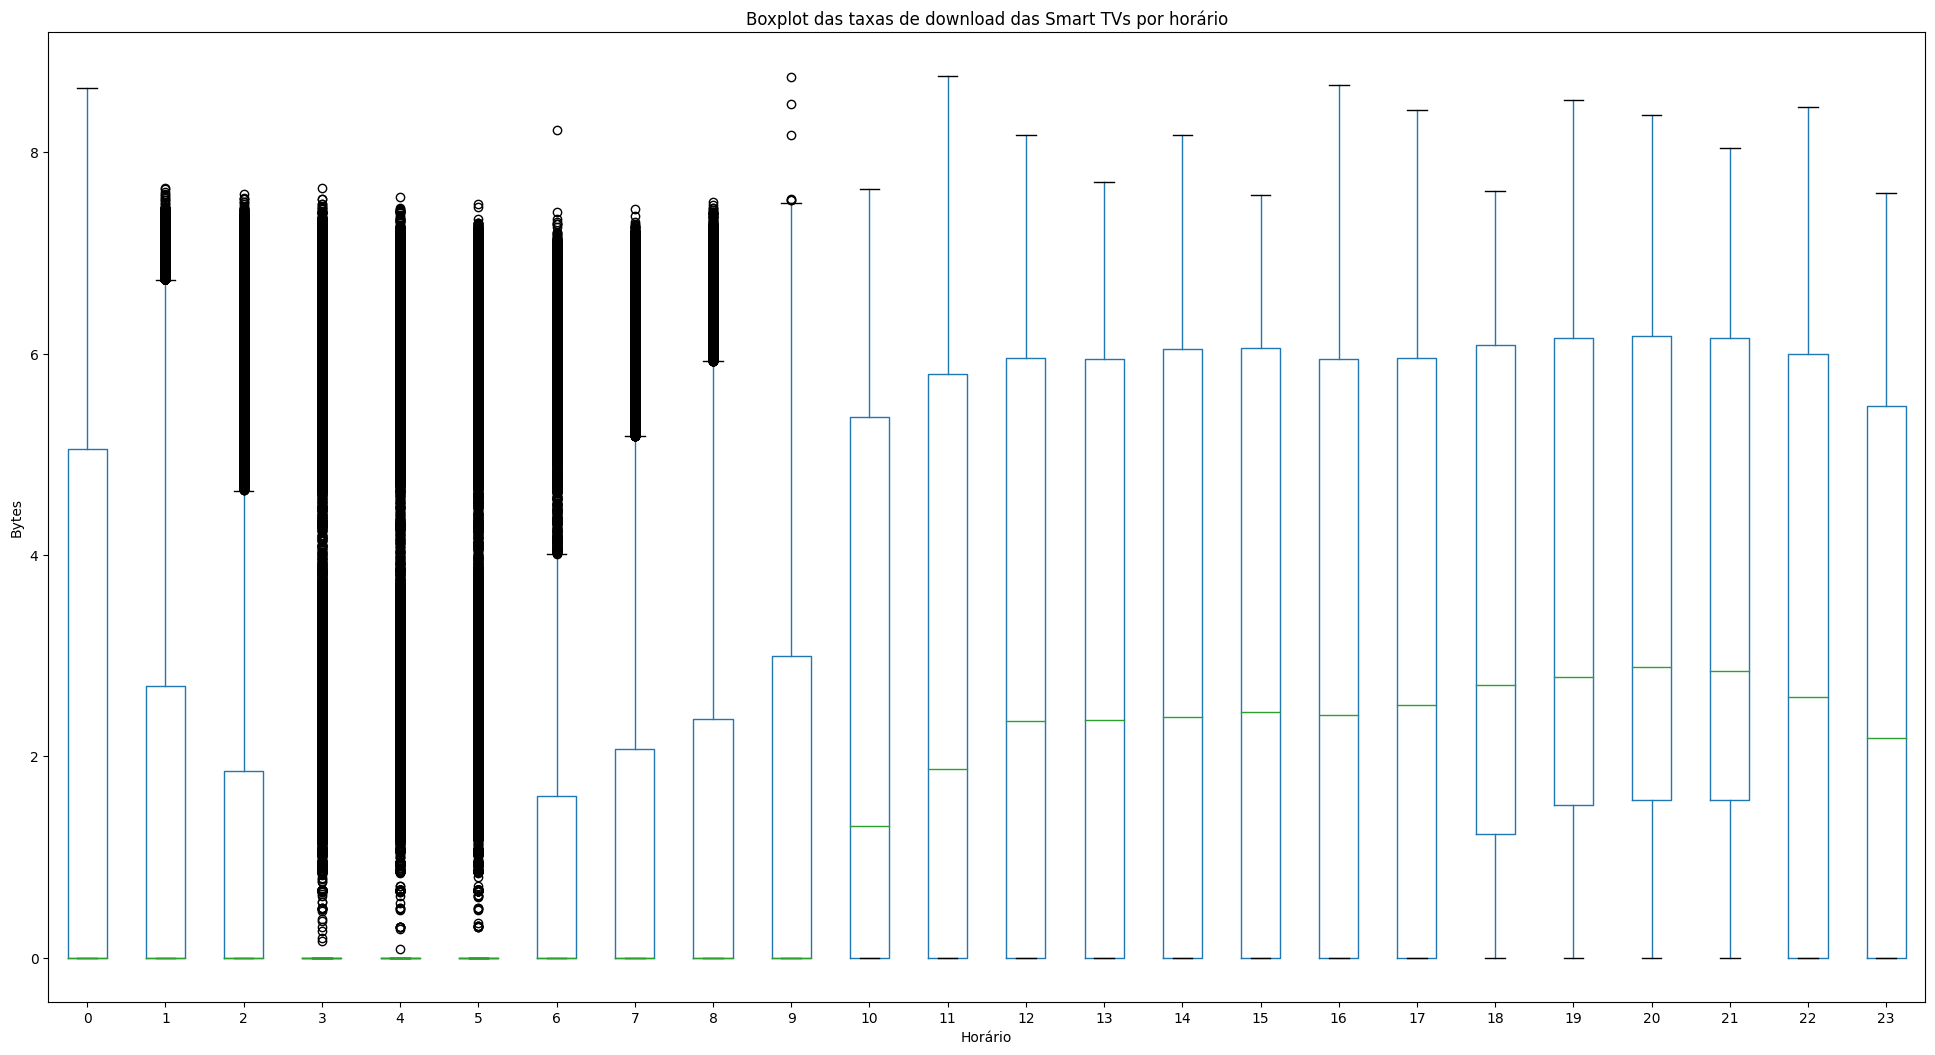

In [16]:
df_smart_tv.boxplot(column='bytes_down', by='date_hour',
                    figsize=(23.465, 12.925), grid=False)
plt.title('Boxplot das taxas de download das Smart TVs por horário')
plt.suptitle('')
plt.xlabel('Horário')
plt.ylabel('Bytes')
plt.show()

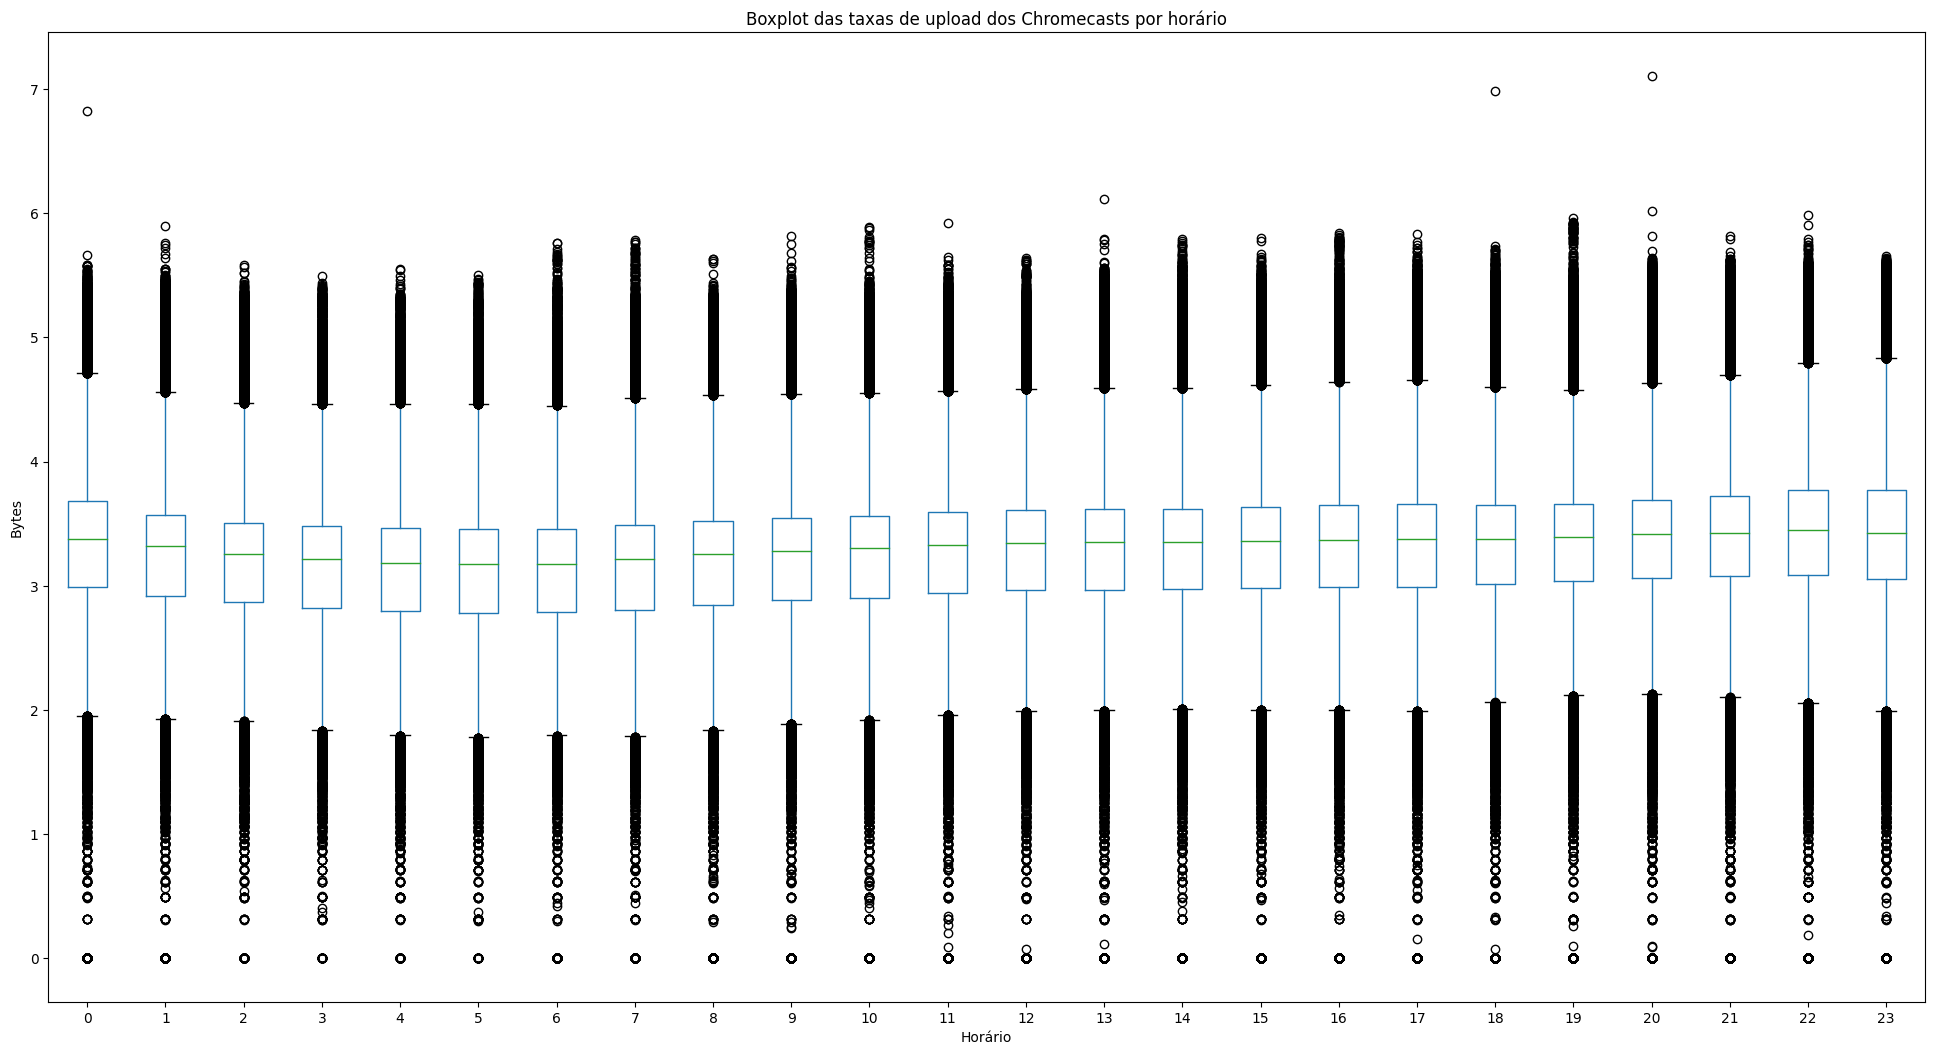

In [17]:
df_chromecast.boxplot(column='bytes_up', by='date_hour',
                    figsize=(23.465, 12.925), grid=False)
plt.title('Boxplot das taxas de upload dos Chromecasts por horário')
plt.suptitle('')
plt.xlabel('Horário')
plt.ylabel('Bytes')
plt.show()

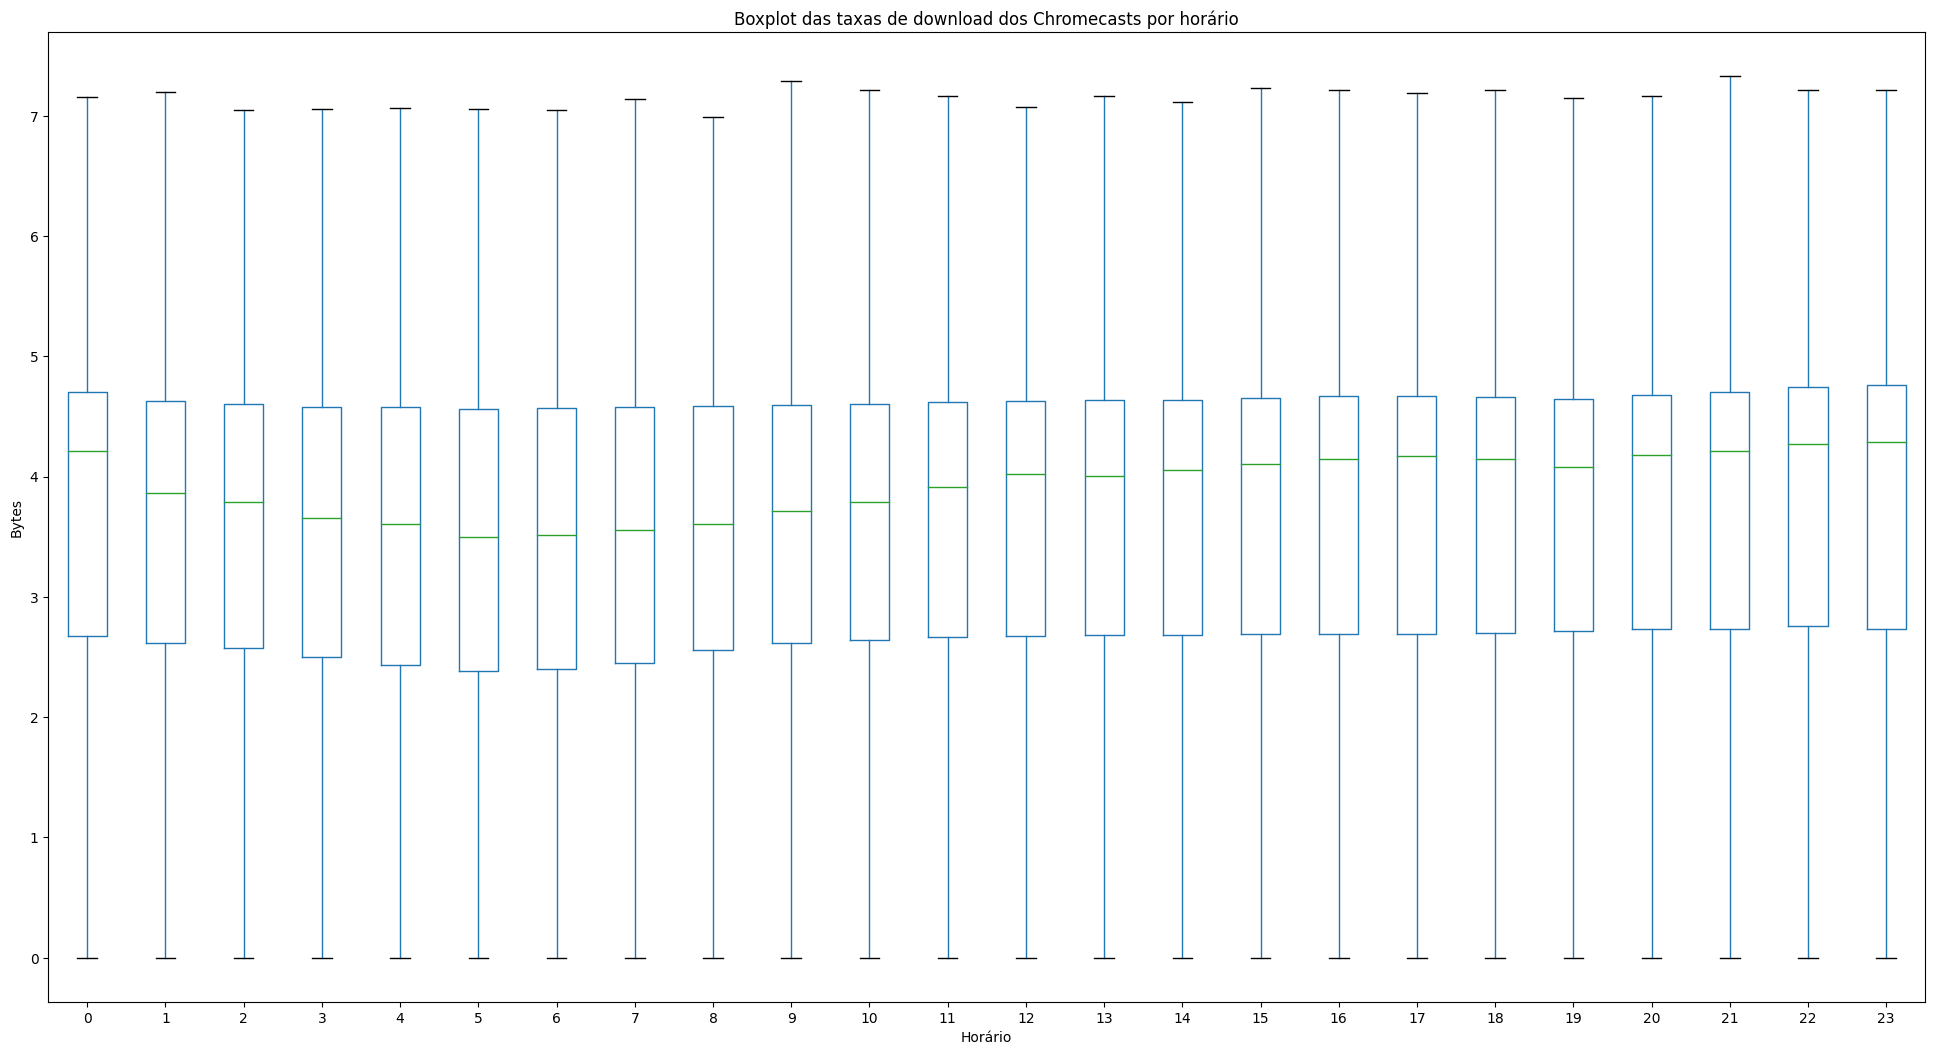

In [18]:
df_chromecast.boxplot(column='bytes_down', by='date_hour',
                    figsize=(23.465, 12.925), grid=False)
plt.title('Boxplot das taxas de download dos Chromecasts por horário')
plt.suptitle('')
plt.xlabel('Horário')
plt.ylabel('Bytes')
plt.show()

## Means of Datasets per Hour

In [19]:
def plot_data(df: pd.Series, ax: plt.axes, title: str) -> None:
    '''
    Plot the data on the given axis with the given title.
    
    Args:
        df: The dataframe containing the data to be plotted.
        ax: The axis object on which to plot the data.
        title: The title of the plot.

    Returns:
        None
    '''
    ax.plot(df)
    ax.set_title(title)
    ax.set_xlabel('Horário')
    ax.set_ylabel('log10(Bytes)')

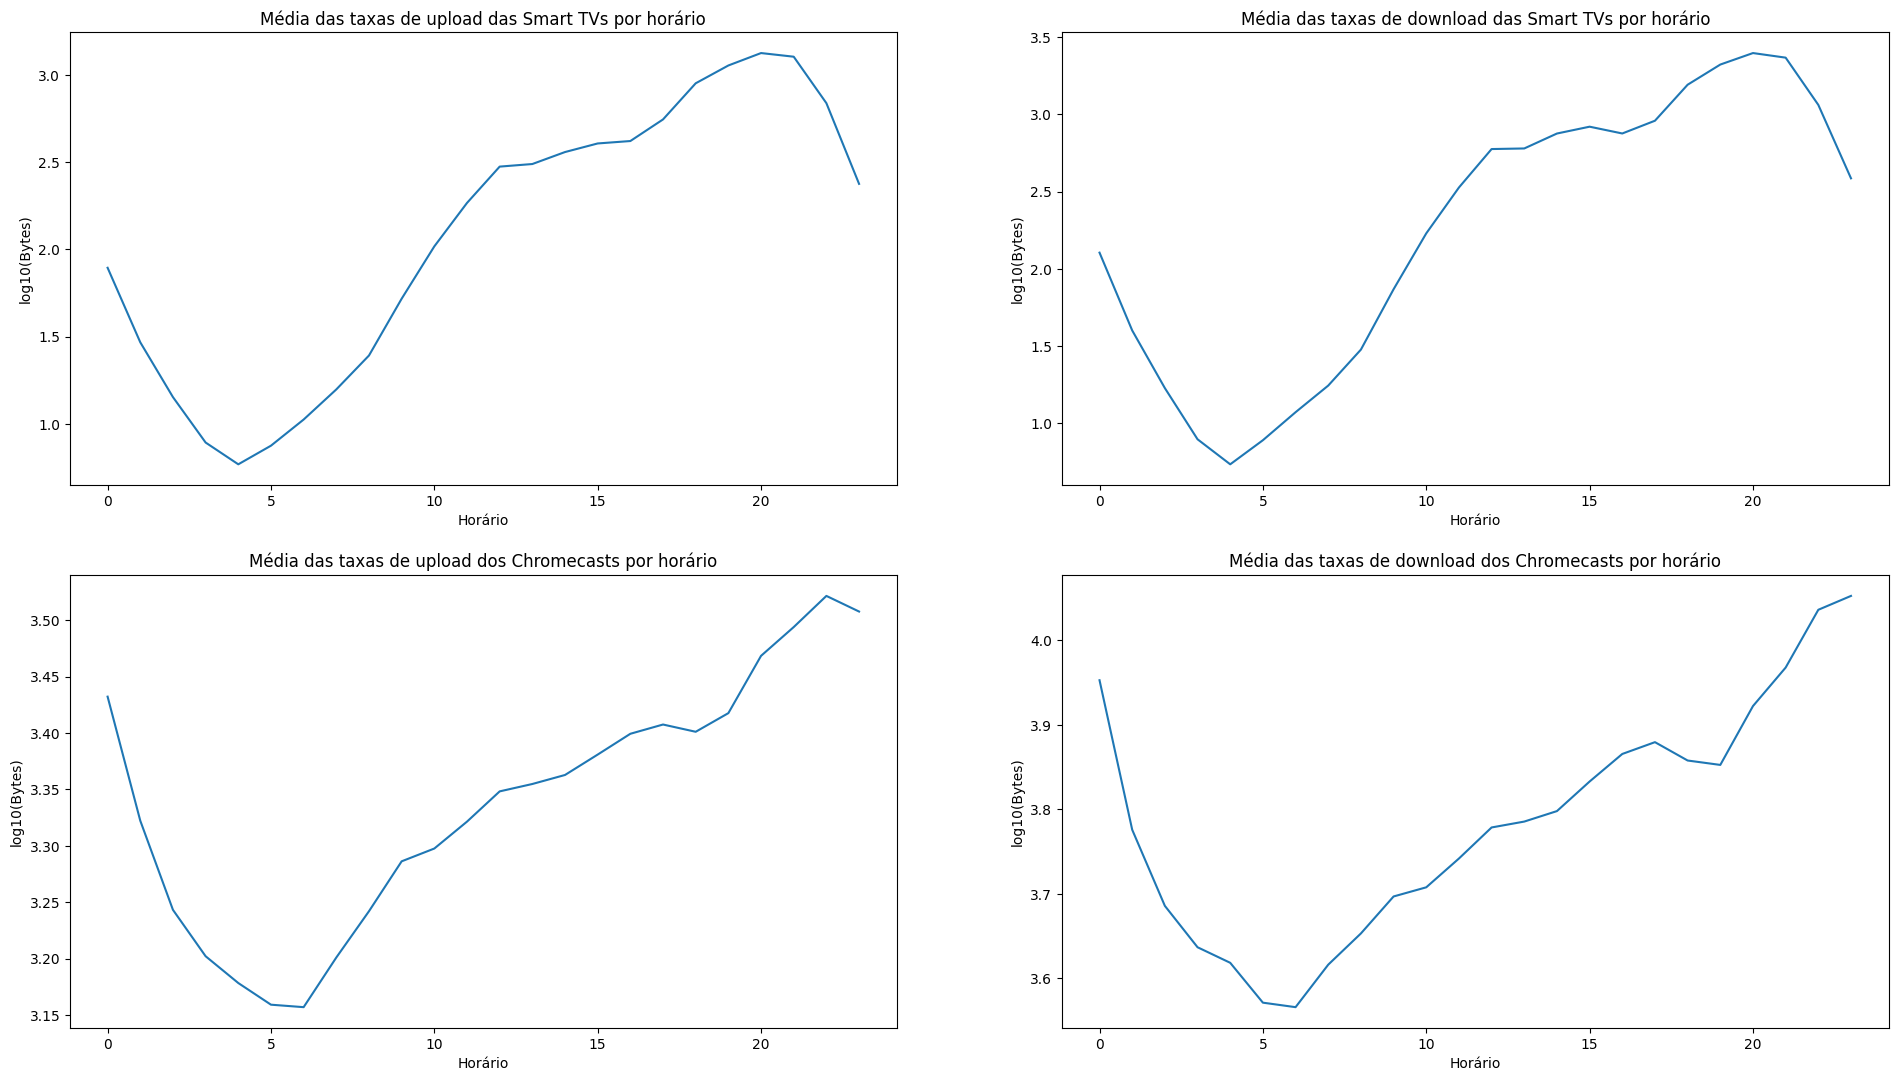

In [20]:

fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_data(df_smart_tv.groupby('date_hour')['bytes_up'].mean(
), ax[0][0], 'Média das taxas de upload das Smart TVs por horário')
plot_data(df_smart_tv.groupby('date_hour')['bytes_down'].mean(
), ax[0][1], 'Média das taxas de download das Smart TVs por horário')

plot_data(df_chromecast.groupby('date_hour')['bytes_up'].mean(
), ax[1][0], 'Média das taxas de upload dos Chromecasts por horário')
plot_data(df_chromecast.groupby('date_hour')['bytes_down'].mean(
), ax[1][1], 'Média das taxas de download dos Chromecasts por horário')

plt.show()


## Variances of Datasets per Hour

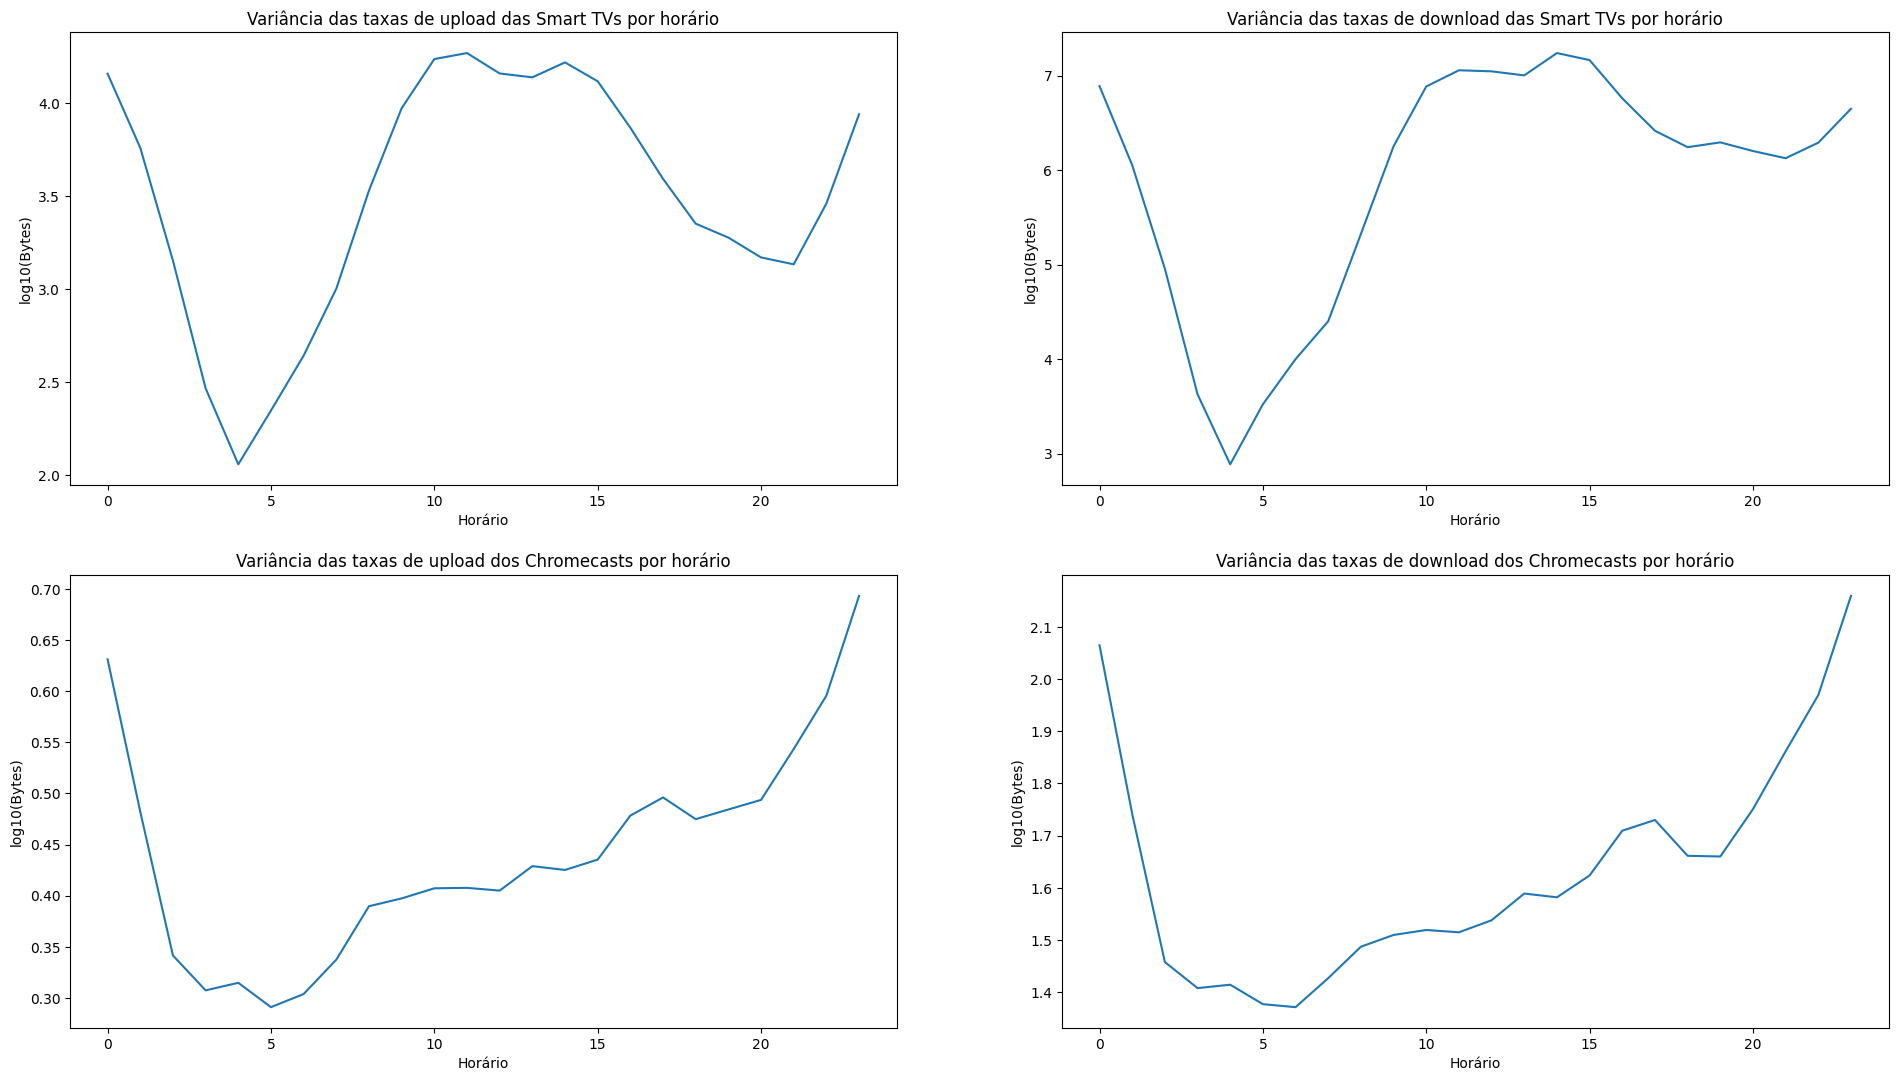

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_data(df_smart_tv.groupby('date_hour')['bytes_up'].var(
), ax[0][0], 'Variância das taxas de upload das Smart TVs por horário')
plot_data(df_smart_tv.groupby('date_hour')['bytes_down'].var(
), ax[0][1], 'Variância das taxas de download das Smart TVs por horário')

plot_data(df_chromecast.groupby('date_hour')['bytes_up'].var(
), ax[1][0], 'Variância das taxas de upload dos Chromecasts por horário')
plot_data(df_chromecast.groupby('date_hour')['bytes_down'].var(
), ax[1][1], 'Variância das taxas de download dos Chromecasts por horário')

plt.show()


## Standard Deviations of Datasets per Hour

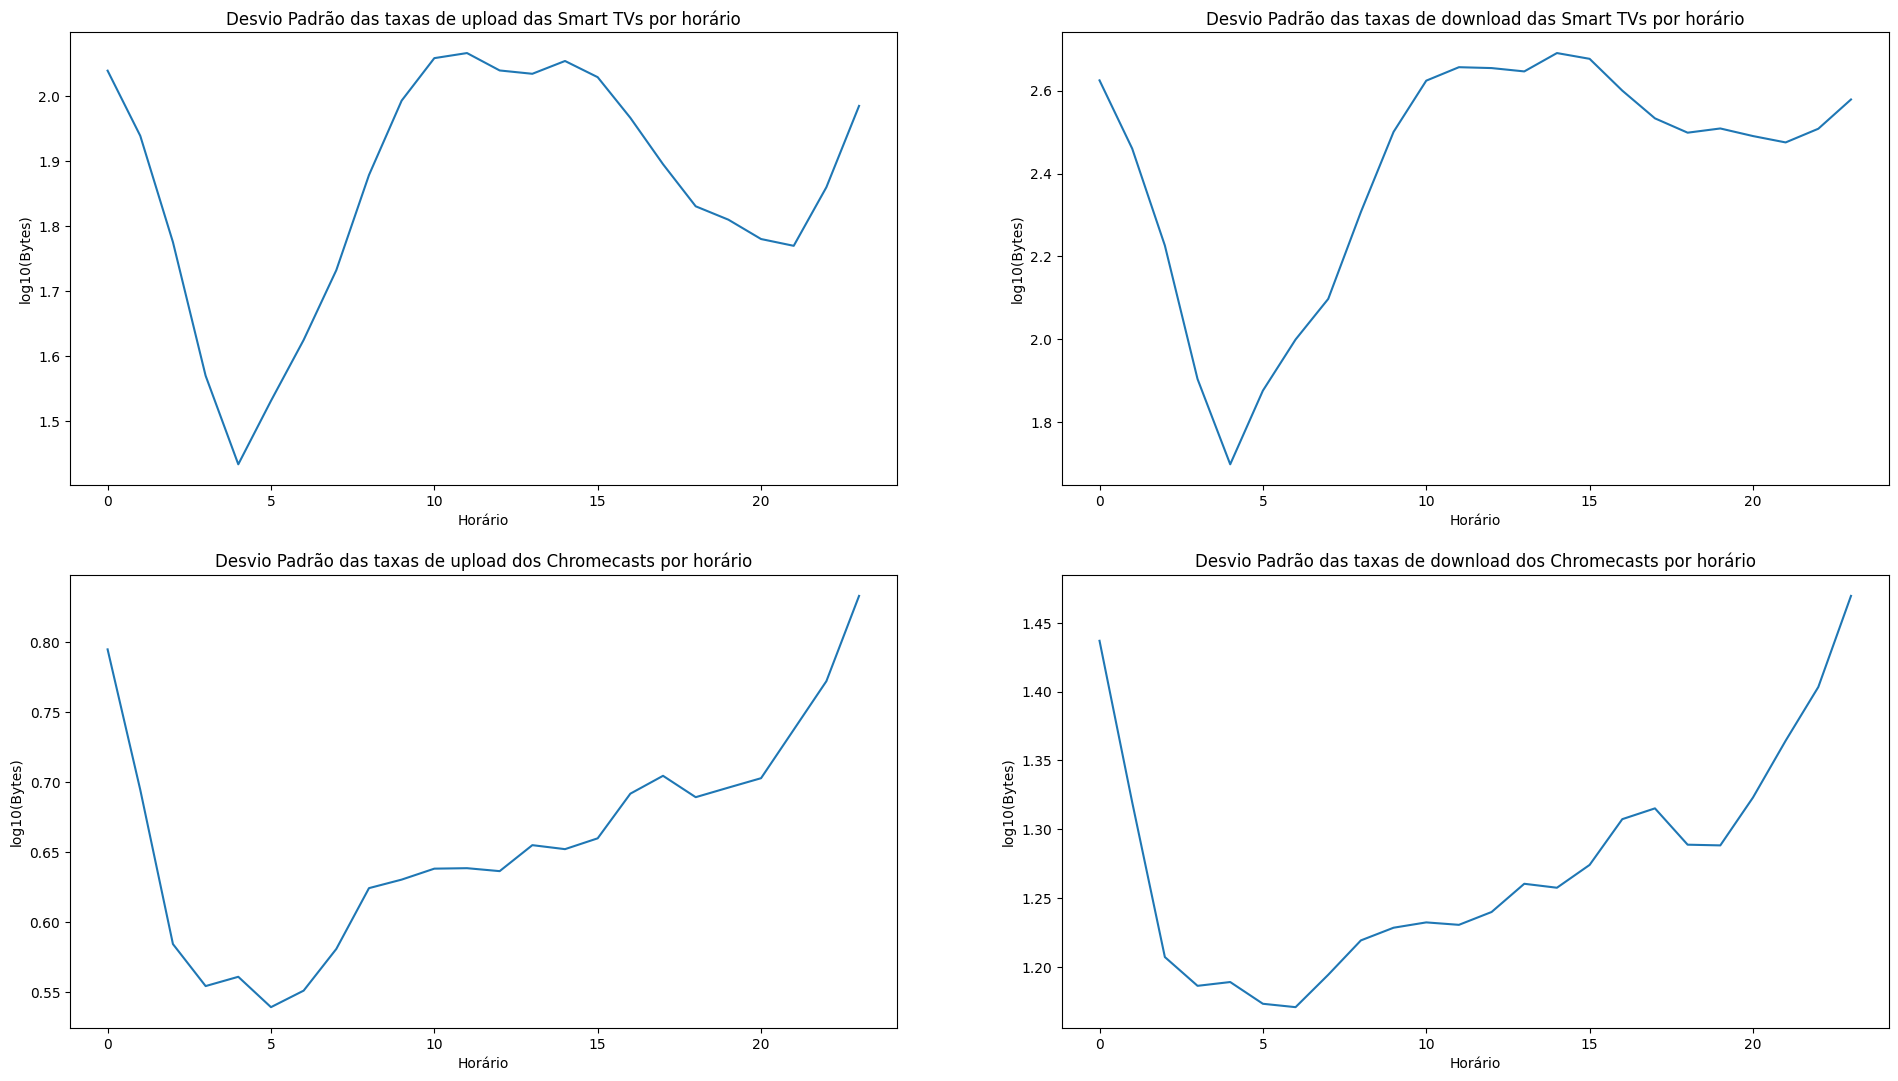

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_data(df_smart_tv.groupby('date_hour')['bytes_up'].std(
), ax[0][0], 'Desvio Padrão das taxas de upload das Smart TVs por horário')
plot_data(df_smart_tv.groupby('date_hour')['bytes_down'].std(
), ax[0][1], 'Desvio Padrão das taxas de download das Smart TVs por horário')

plot_data(df_chromecast.groupby('date_hour')['bytes_up'].std(
), ax[1][0], 'Desvio Padrão das taxas de upload dos Chromecasts por horário')
plot_data(df_chromecast.groupby('date_hour')['bytes_down'].std(
), ax[1][1], 'Desvio Padrão das taxas de download dos Chromecasts por horário')

plt.show()


## Peak Traffic Hours

## Choosing the 8 datasets

In [23]:
dataset_1 = df_smart_tv[df_smart_tv['date_hour'] == df_smart_tv.groupby(
    "date_hour")["bytes_up"].median().argmax()]["bytes_up"]
dataset_2 = df_smart_tv[df_smart_tv['date_hour'] == df_smart_tv.groupby(
    "date_hour")["bytes_up"].mean().argmax()]["bytes_up"]
dataset_3 = df_smart_tv[df_smart_tv['date_hour'] == df_smart_tv.groupby(
    "date_hour")["bytes_down"].median().argmax()]["bytes_down"]
dataset_4 = df_smart_tv[df_smart_tv['date_hour'] == df_smart_tv.groupby(
    "date_hour")["bytes_down"].mean().argmax()]["bytes_down"]
dataset_5 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_up"].median().argmax()]["bytes_up"]
dataset_6 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_up"].mean().argmax()]["bytes_up"]
dataset_7 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_down"].median().argmax()]["bytes_down"]
dataset_8 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_down"].mean().argmax()]["bytes_down"]

dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, dataset_6, dataset_7, dataset_8


(268        4.566231
 269        4.897418
 270        4.786100
 271        4.579742
 272        4.577396
              ...   
 4417305    5.229510
 4417306    5.350684
 4417307    5.317948
 4417766    3.828982
 4417767    0.000000
 Name: bytes_up, Length: 212608, dtype: float64,
 268        4.566231
 269        4.897418
 270        4.786100
 271        4.579742
 272        4.577396
              ...   
 4417305    5.229510
 4417306    5.350684
 4417307    5.317948
 4417766    3.828982
 4417767    0.000000
 Name: bytes_up, Length: 212608, dtype: float64,
 268        5.915830
 269        6.145693
 270        5.925210
 271        5.836741
 272        5.846038
              ...   
 4417305    6.623223
 4417306    6.766381
 4417307    6.722319
 4417766    4.000391
 4417767    0.000000
 Name: bytes_down, Length: 212608, dtype: float64,
 268        5.915830
 269        6.145693
 270        5.925210
 271        5.836741
 272        5.846038
              ...   
 4417305    6.623223
 4417306   

## Histograms of 8 Datasets

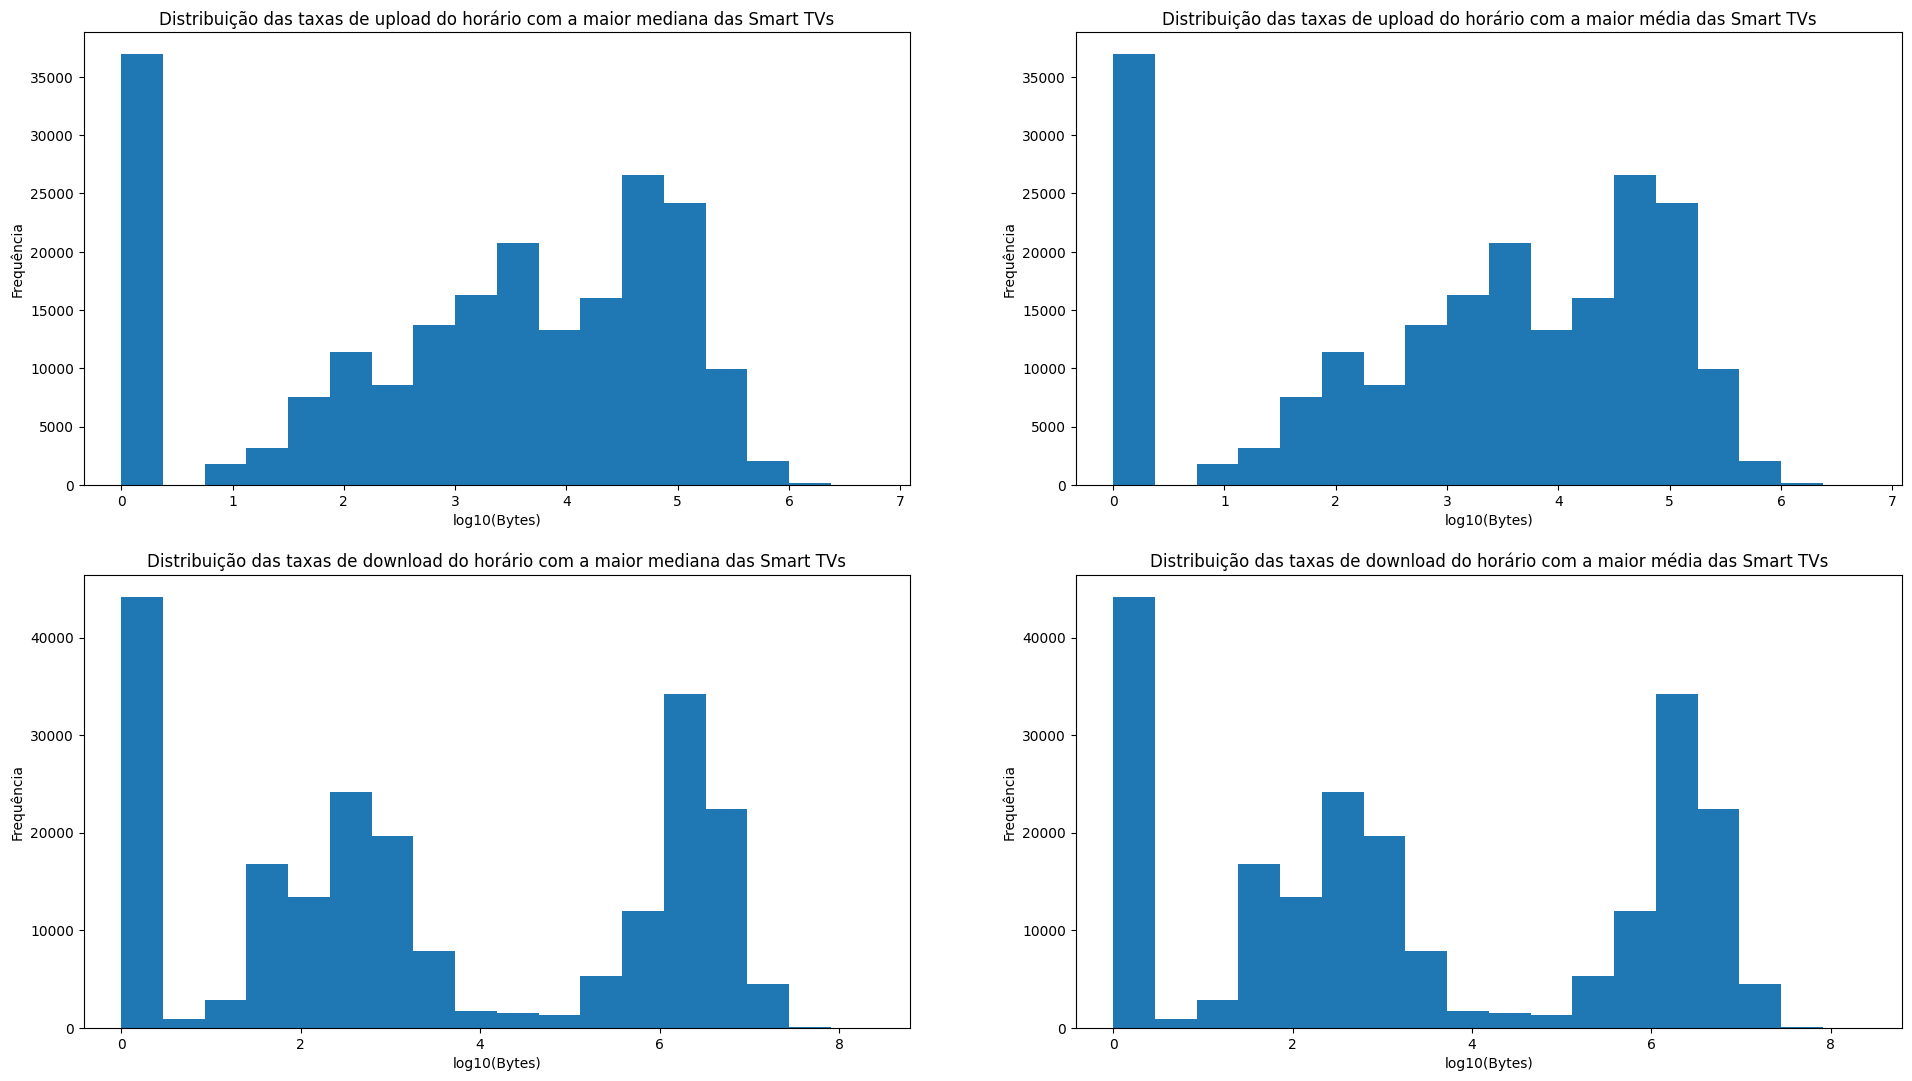

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_histogram(ax=ax[0][0], data=dataset_1,
               title="Distribuição das taxas de upload do horário com a maior mediana das Smart TVs")
plot_histogram(ax=ax[0][1], data=dataset_2,
               title="Distribuição das taxas de upload do horário com a maior média das Smart TVs")
plot_histogram(ax=ax[1][0], data=dataset_3,
               title="Distribuição das taxas de download do horário com a maior mediana das Smart TVs")
plot_histogram(ax=ax[1][1], data=dataset_4,
               title="Distribuição das taxas de download do horário com a maior média das Smart TVs")

plt.show()


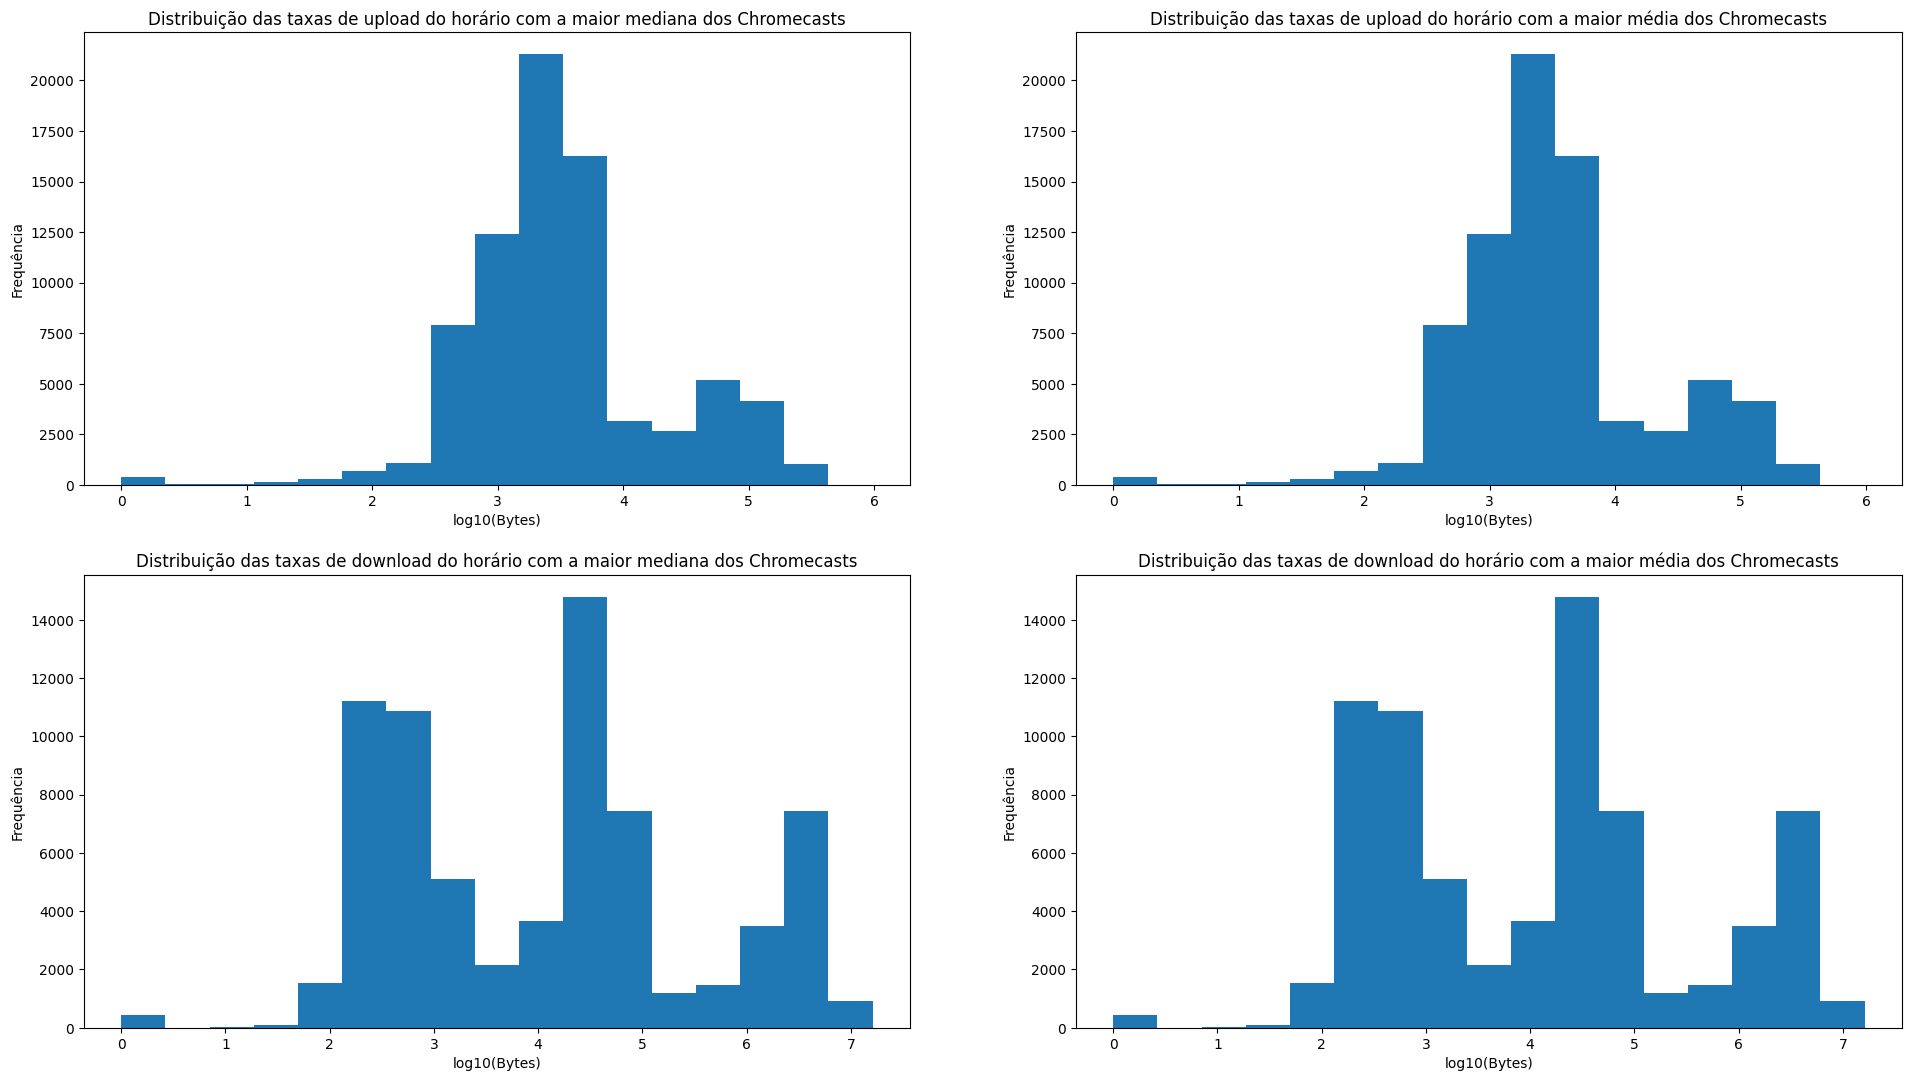

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_histogram(ax=ax[0][0], data=dataset_5,
               title="Distribuição das taxas de upload do horário com a maior mediana dos Chromecasts")
plot_histogram(ax=ax[0][1], data=dataset_6,
               title="Distribuição das taxas de upload do horário com a maior média dos Chromecasts")
plot_histogram(ax=ax[1][0], data=dataset_7,
               title="Distribuição das taxas de download do horário com a maior mediana dos Chromecasts")
plot_histogram(ax=ax[1][1], data=dataset_8,
               title="Distribuição das taxas de download do horário com a maior média dos Chromecasts")

plt.show()


## MLE Gaussian

In [26]:
datasets = [dataset_1, dataset_2, dataset_3,
                dataset_4, dataset_5, dataset_6,
                dataset_7, dataset_8]
mle_gaussian = []
for dataset in datasets:
    mle_gaussian.append((np.mean(dataset), np.var(dataset)))

mle_gaussian


[(3.124258107506722, 3.1687396722855117),
 (3.124258107506722, 3.1687396722855117),
 (3.3960945564366285, 6.201343416532805),
 (3.3960945564366285, 6.201343416532805),
 (3.521546370674634, 0.5957117566059509),
 (3.521546370674634, 0.5957117566059509),
 (4.052698112658847, 2.1593591160465606),
 (4.052698112658847, 2.1593591160465606)]

## MLE Gamma

In [27]:
from scipy.stats import gamma, norm

mle_gamma = []
for dataset in datasets:
    mle_gamma.append(gamma.fit(dataset))

mle_gamma


[(217.14653644297584, -23.859605776366315, 0.12424488225923055),
 (217.14653644297584, -23.859605776366315, 0.12424488225923055),
 (896.5469322463027, -71.06216506397283, 0.08304989773768084),
 (896.5469322463027, -71.06216506397283, 0.08304989773768084),
 (3148.8815211215233, -39.80898262399852, 0.013760617087012861),
 (3148.8815211215233, -39.80898262399852, 0.013760617087012861),
 (27.130143662628548, -3.631368185066651, 0.2832298335465073),
 (27.130143662628548, -3.631368185066651, 0.2832298335465073)]

## Curves of Datasets

In [28]:
def plot_curves(ax, ds, gauss_params, gamma_params, title):
    ax.hist(ds, bins=get_sturges_bins(ds), density=True)
    x = np.linspace(min(ds), max(ds))
    ax.plot(x, norm.pdf(x, *gauss_params))
    ax.plot(x, gamma.pdf(x, *gamma_params))
    ax.set_title(title)
    ax.set_xlabel("log10(Bytes)")
    ax.set_ylabel("Frequência")

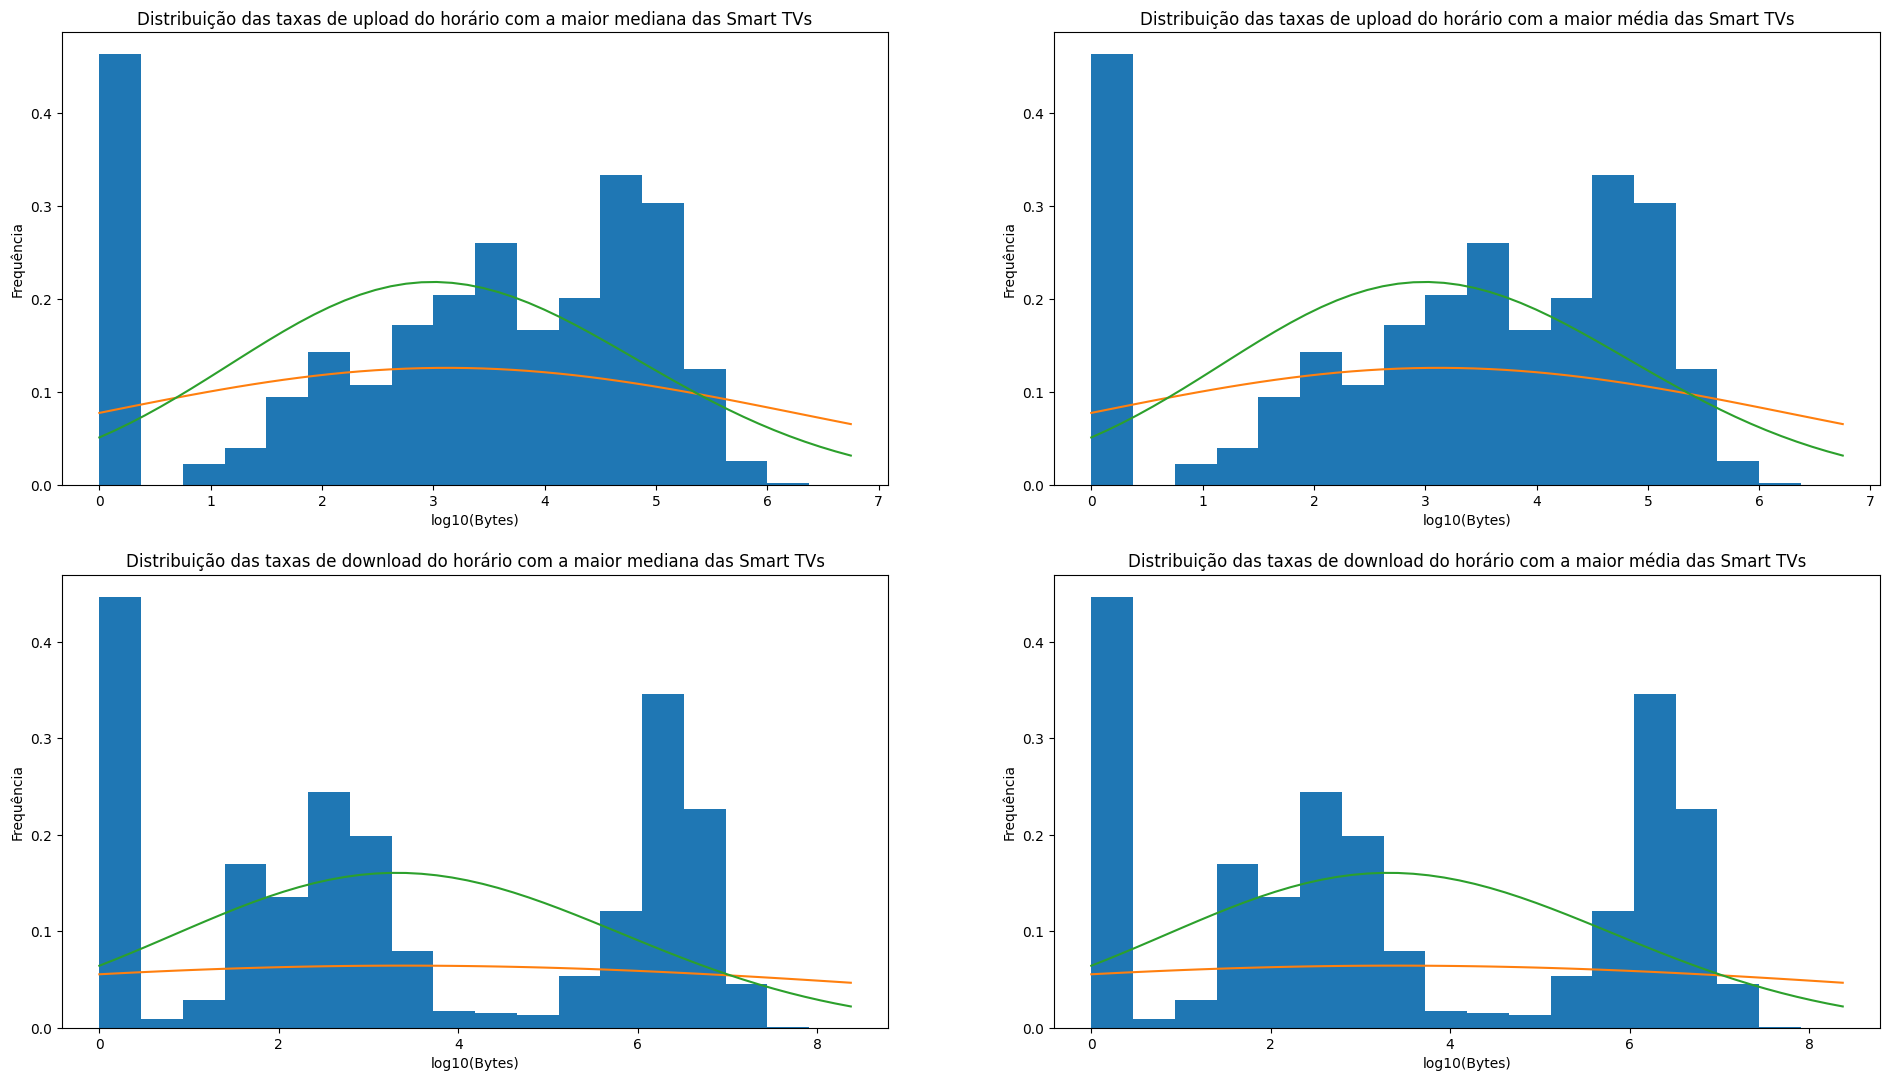

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_curves(ax[0][0], dataset_1, mle_gaussian[0], mle_gamma[0],
            "Distribuição das taxas de upload do horário com a maior mediana das Smart TVs")
plot_curves(ax[0][1], dataset_2, mle_gaussian[1], mle_gamma[1],
            "Distribuição das taxas de upload do horário com a maior média das Smart TVs")
plot_curves(ax[1][0], dataset_3, mle_gaussian[2], mle_gamma[2],
            "Distribuição das taxas de download do horário com a maior mediana das Smart TVs")
plot_curves(ax[1][1], dataset_4, mle_gaussian[3], mle_gamma[3],
            "Distribuição das taxas de download do horário com a maior média das Smart TVs")

plt.show()


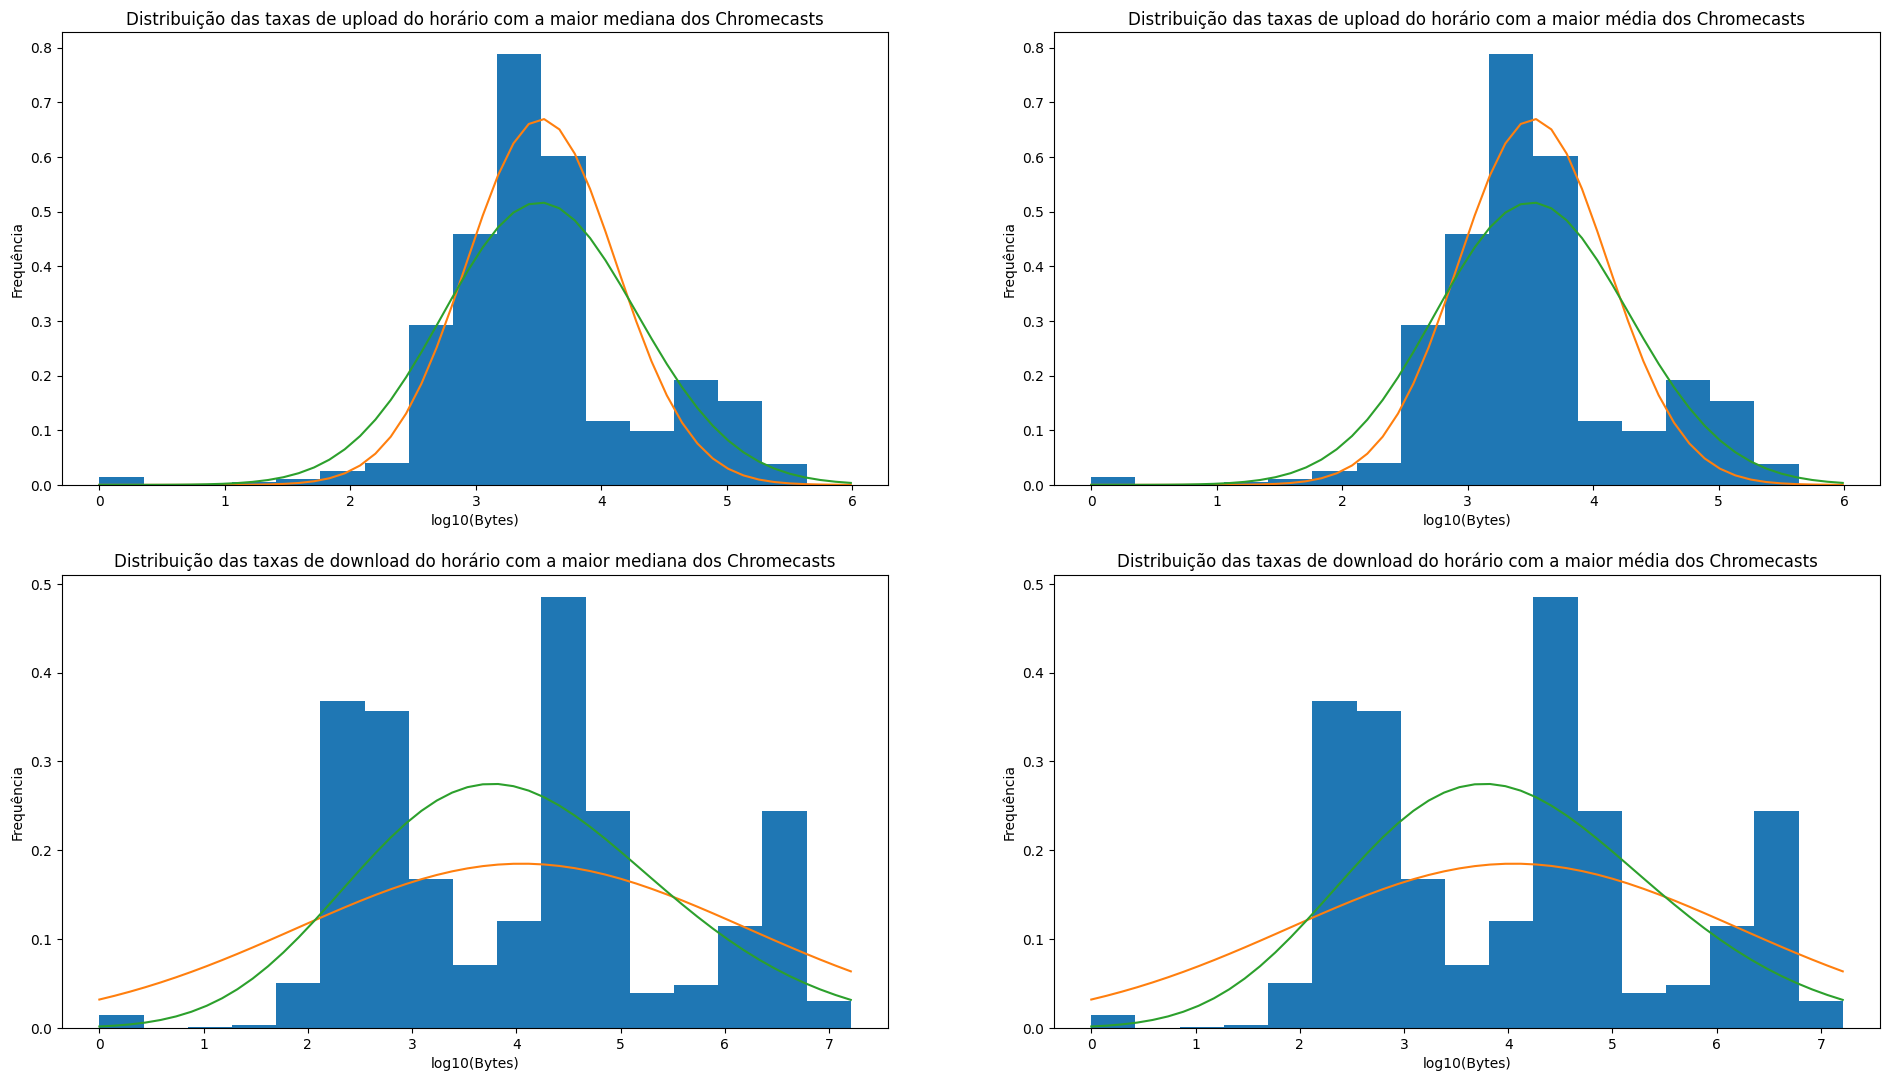

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_curves(ax[0][0], dataset_5, mle_gaussian[4], mle_gamma[4],
            "Distribuição das taxas de upload do horário com a maior mediana dos Chromecasts")
plot_curves(ax[0][1], dataset_6, mle_gaussian[5], mle_gamma[5],
            "Distribuição das taxas de upload do horário com a maior média dos Chromecasts")
plot_curves(ax[1][0], dataset_7, mle_gaussian[6], mle_gamma[6],
            "Distribuição das taxas de download do horário com a maior mediana dos Chromecasts")
plot_curves(ax[1][1], dataset_8, mle_gaussian[7], mle_gamma[7],
            "Distribuição das taxas de download do horário com a maior média dos Chromecasts")

plt.show()


## Probability Plots of Datasets

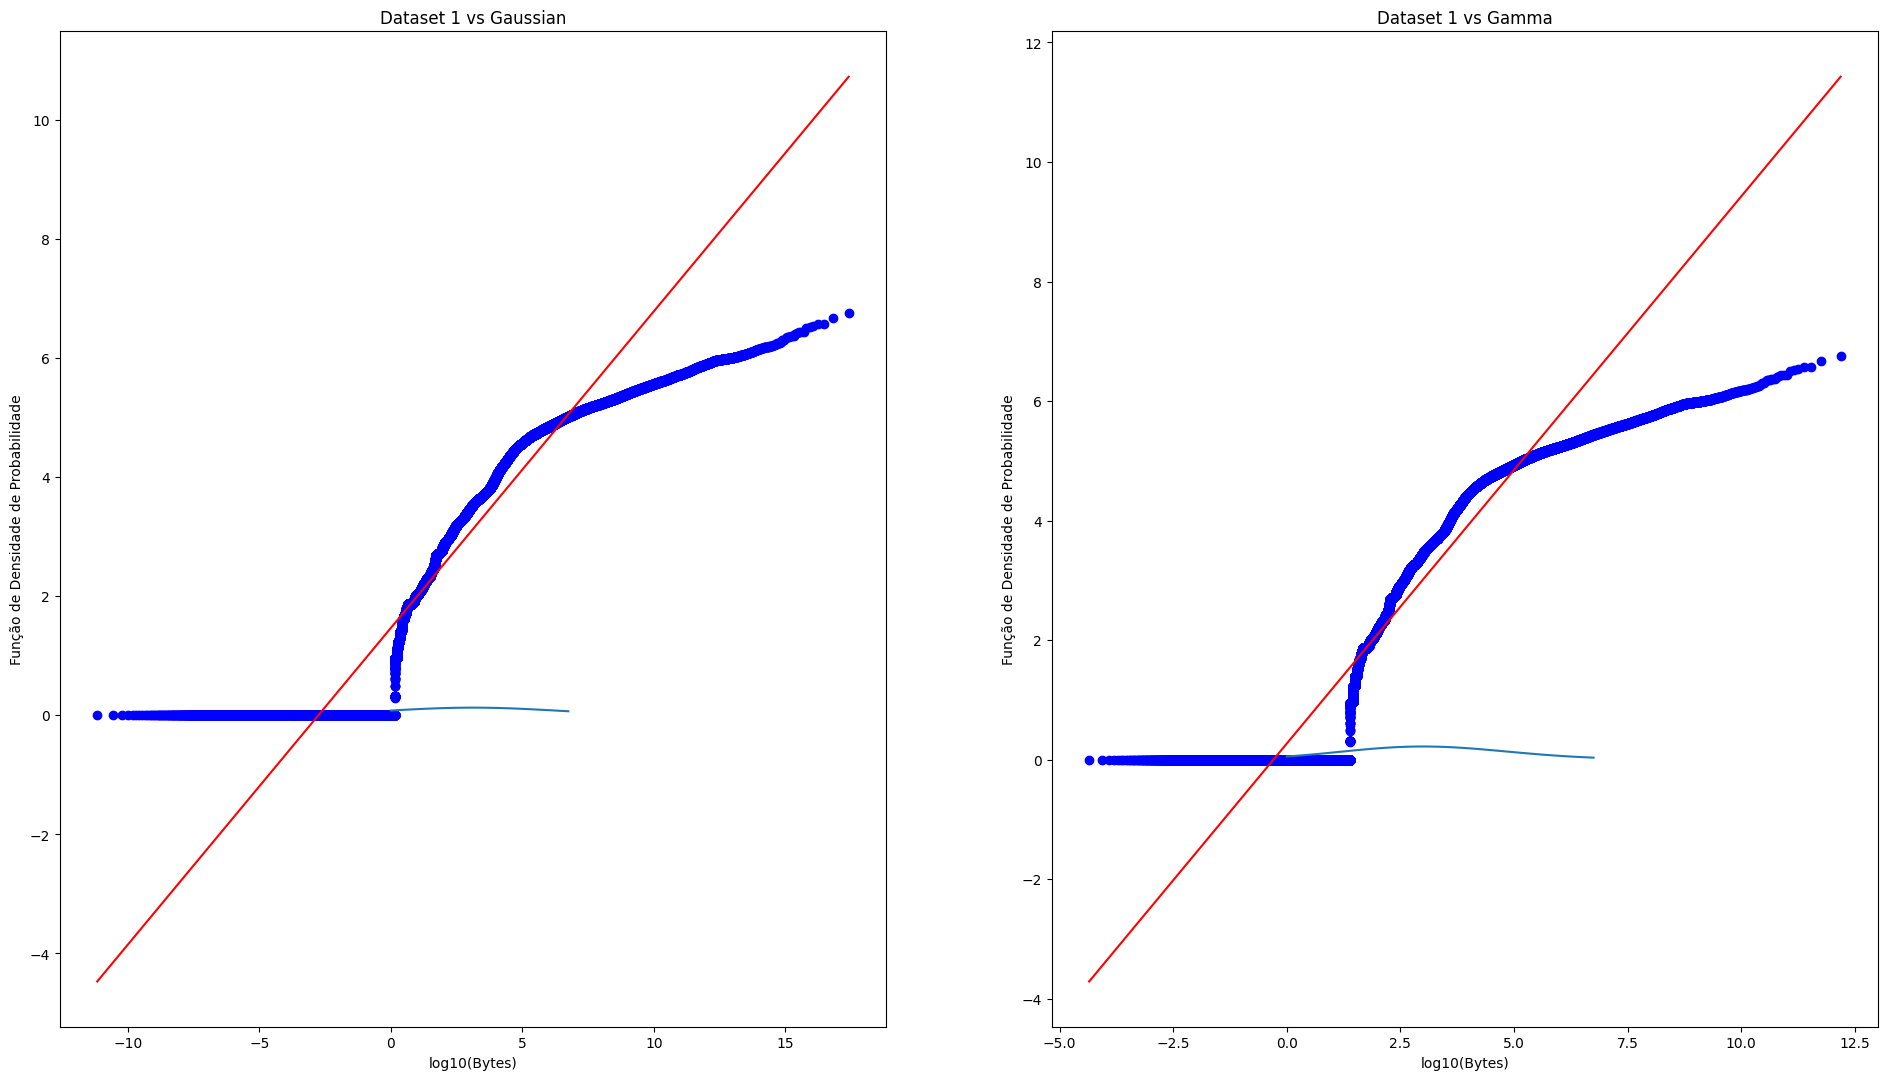

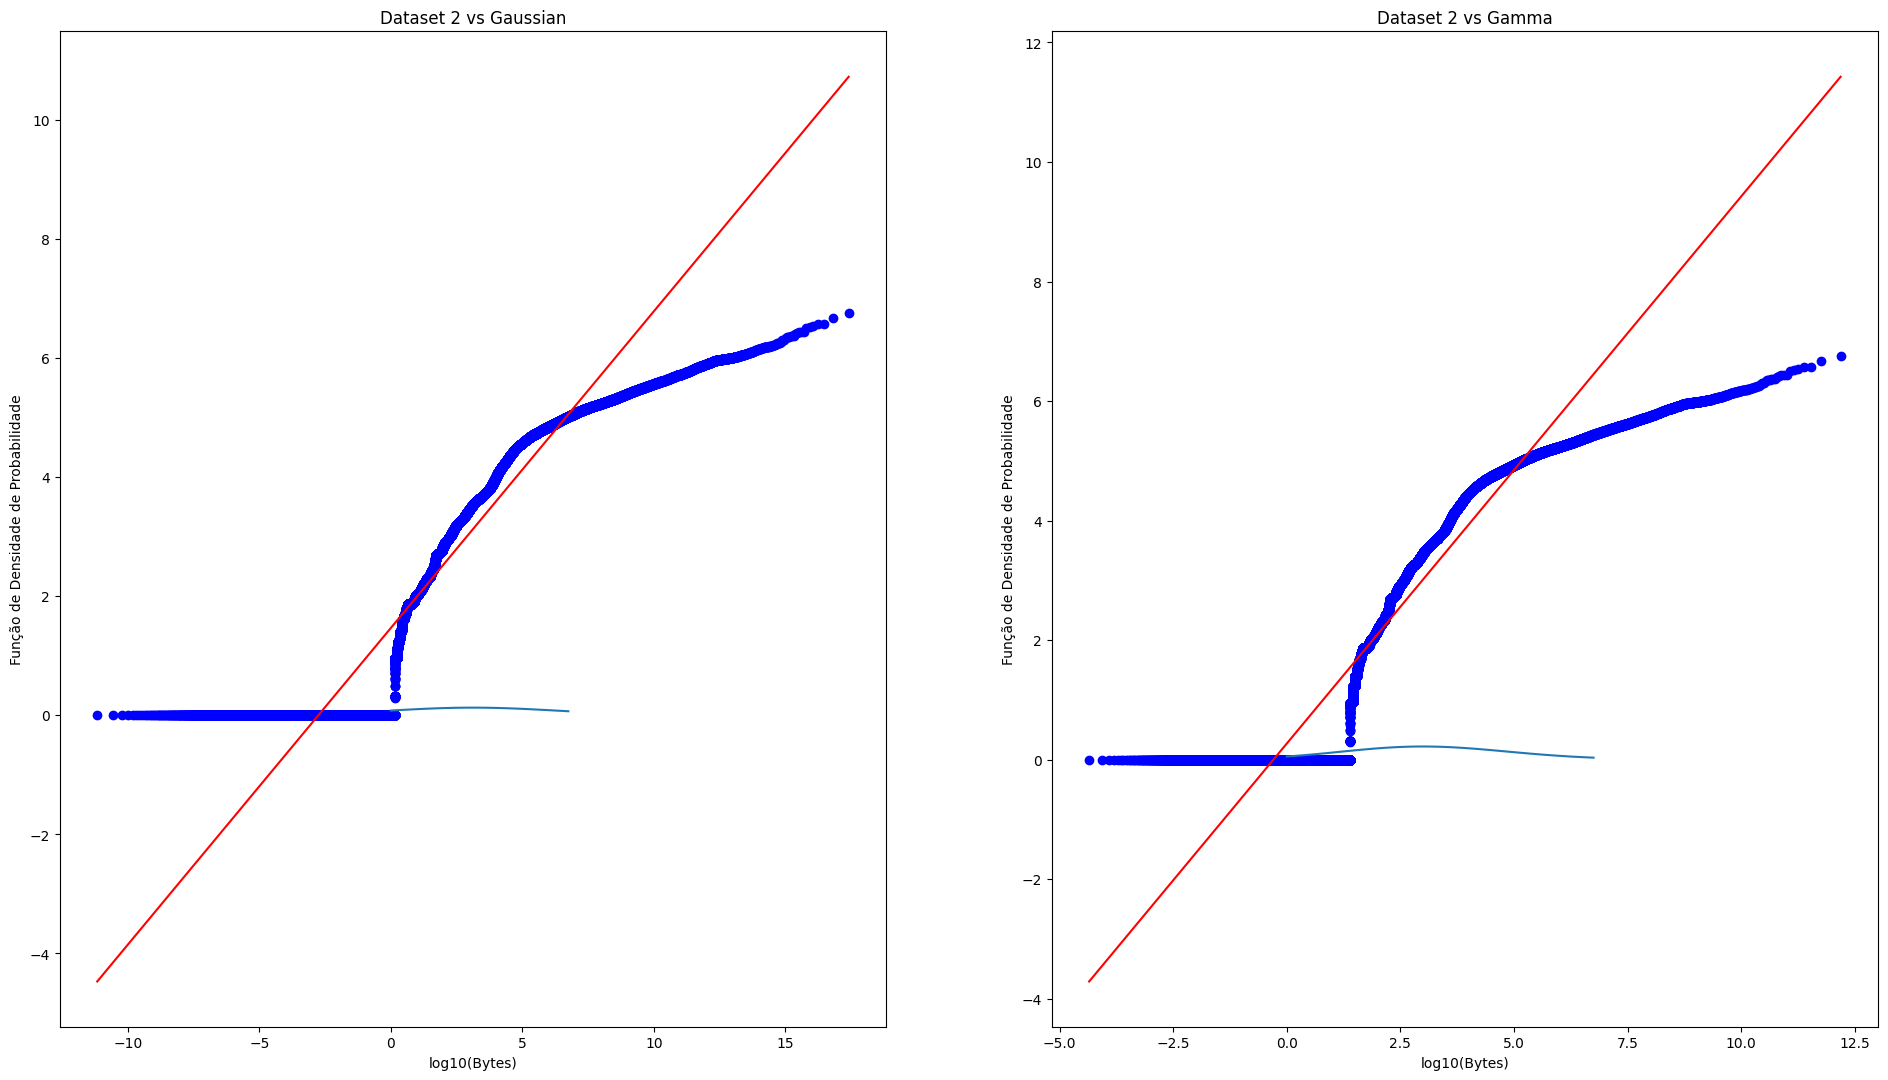

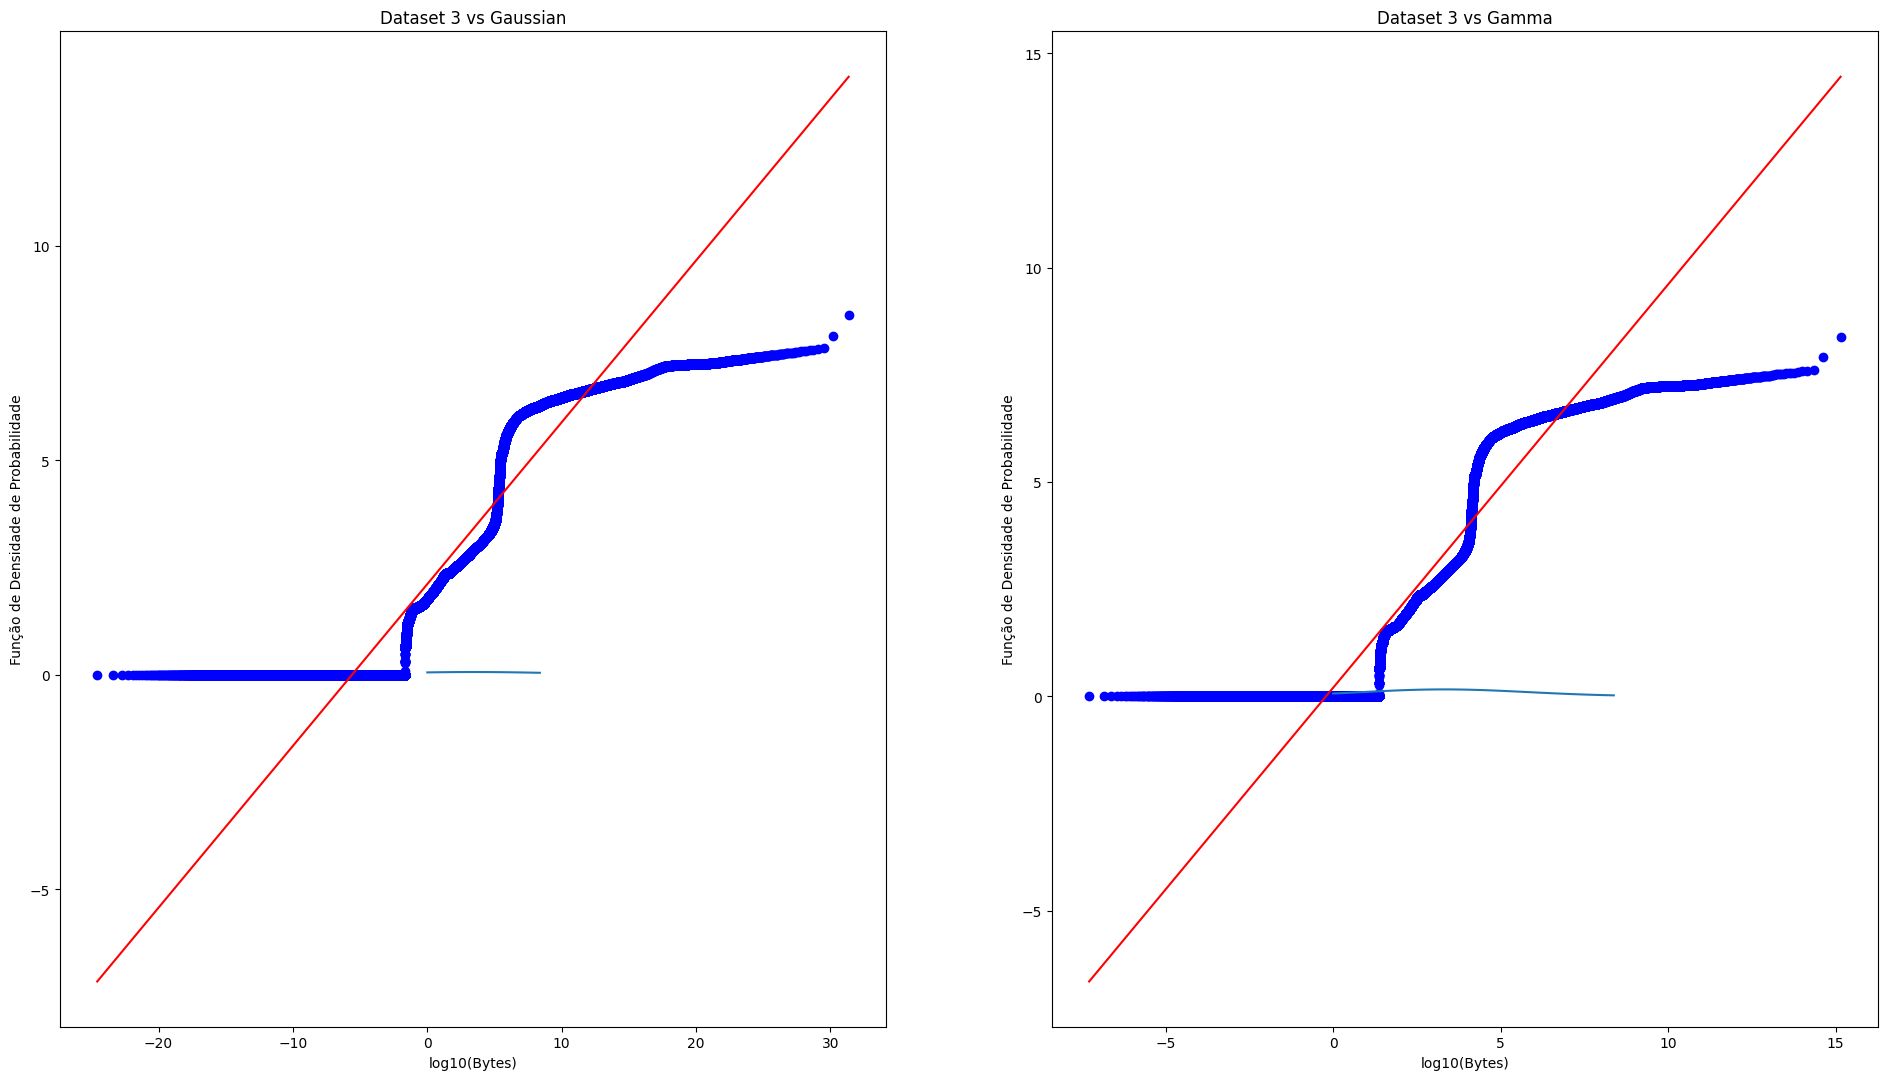

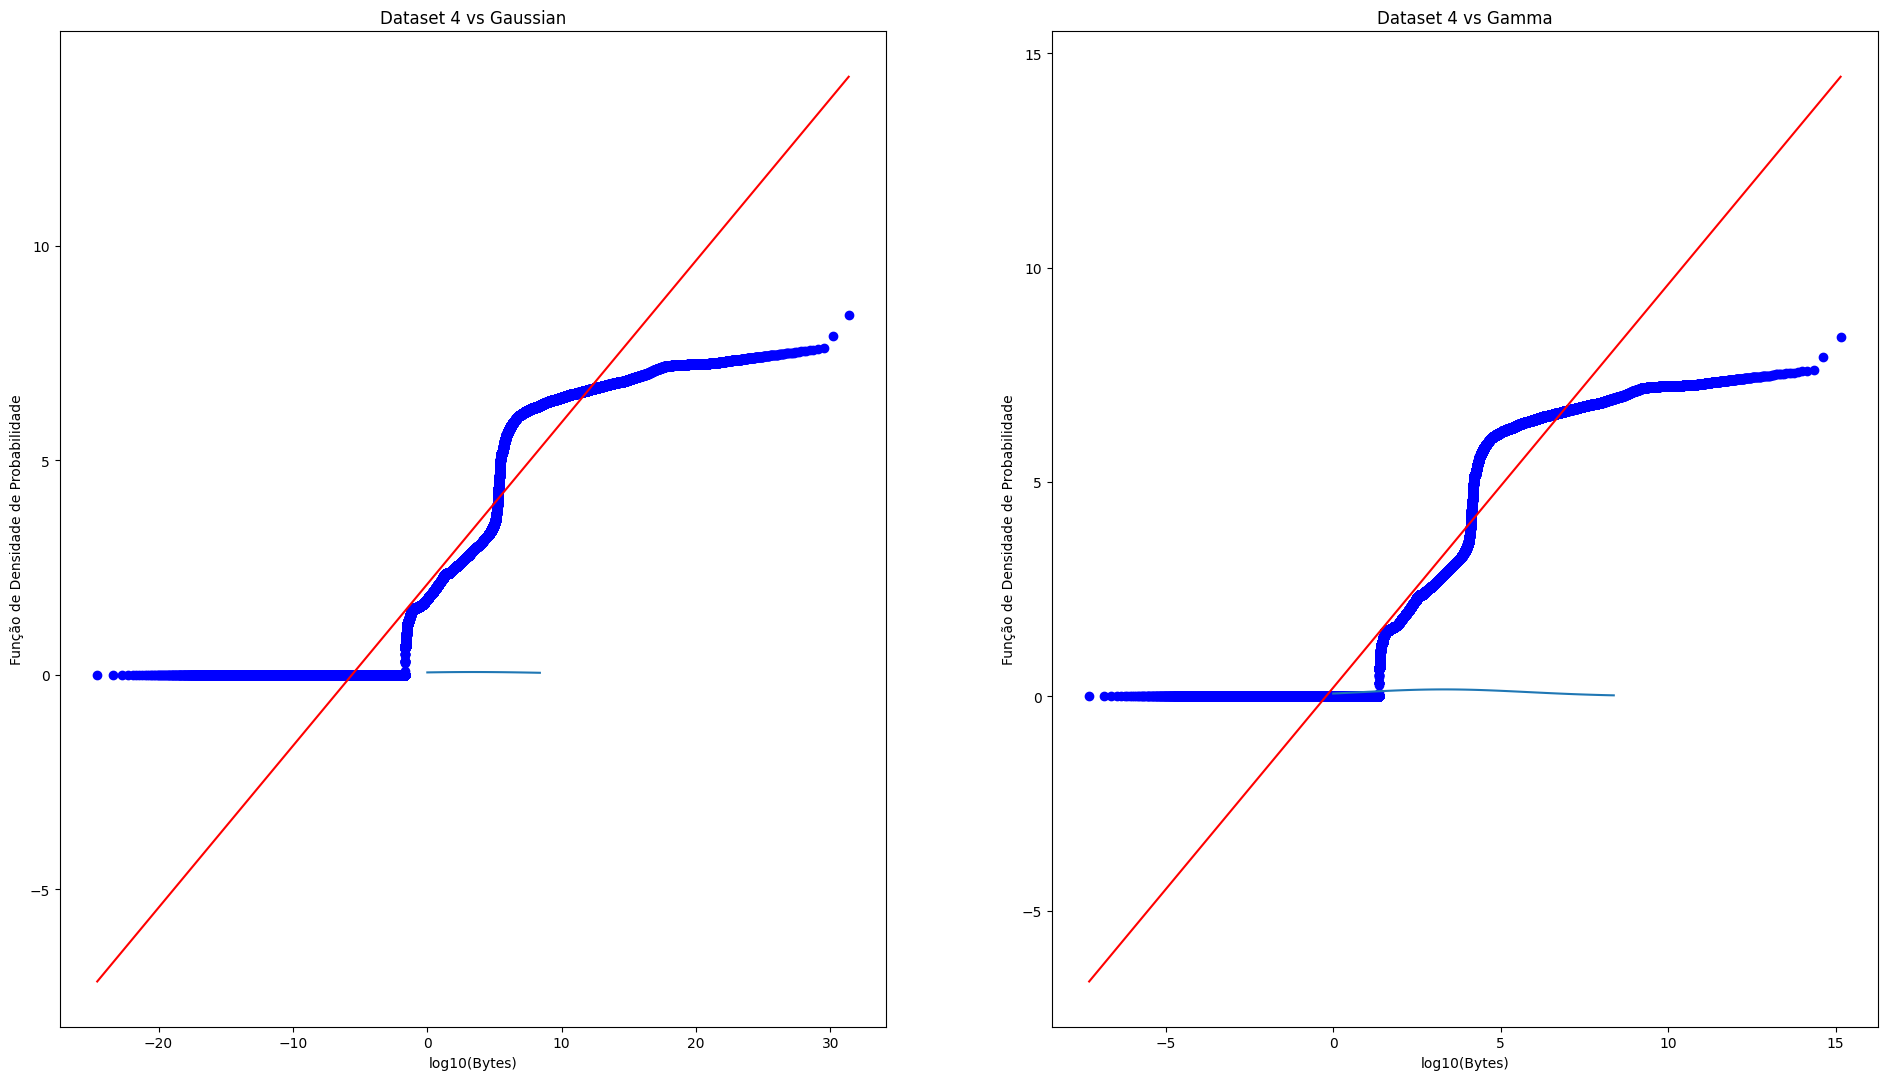

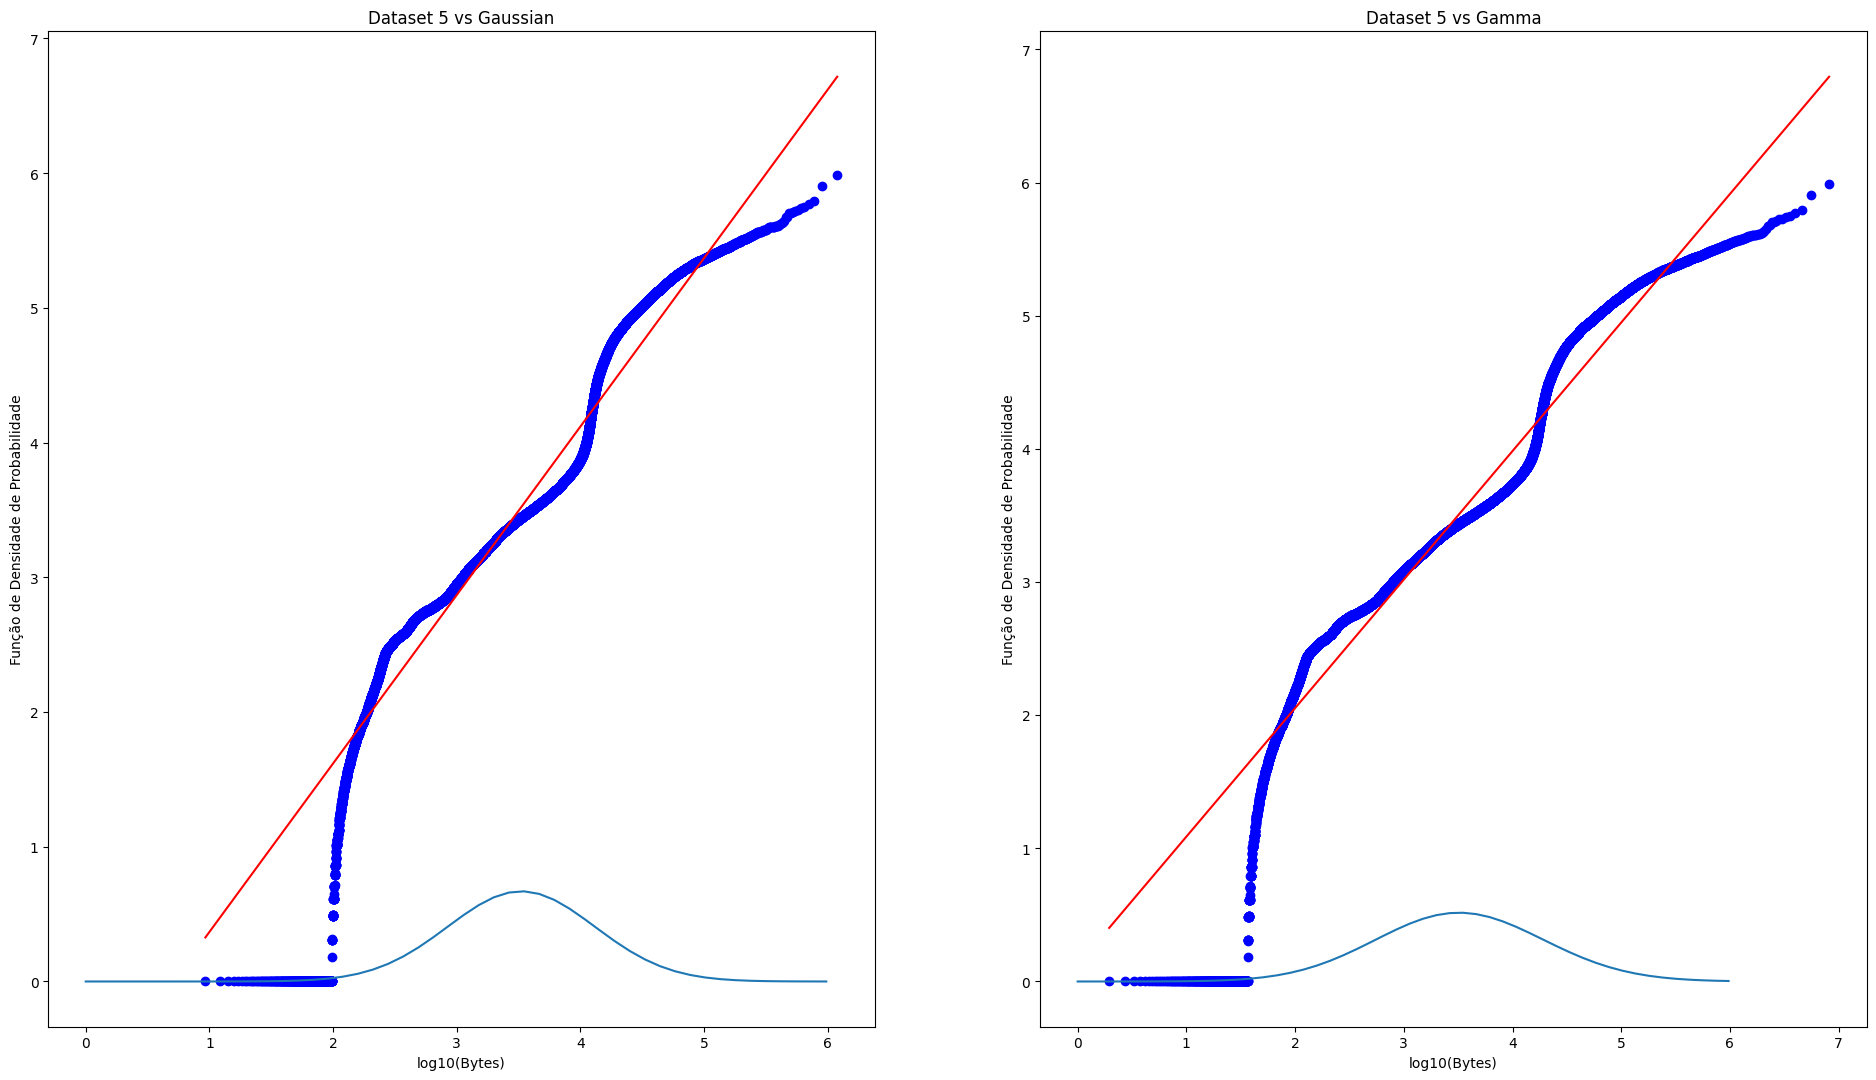

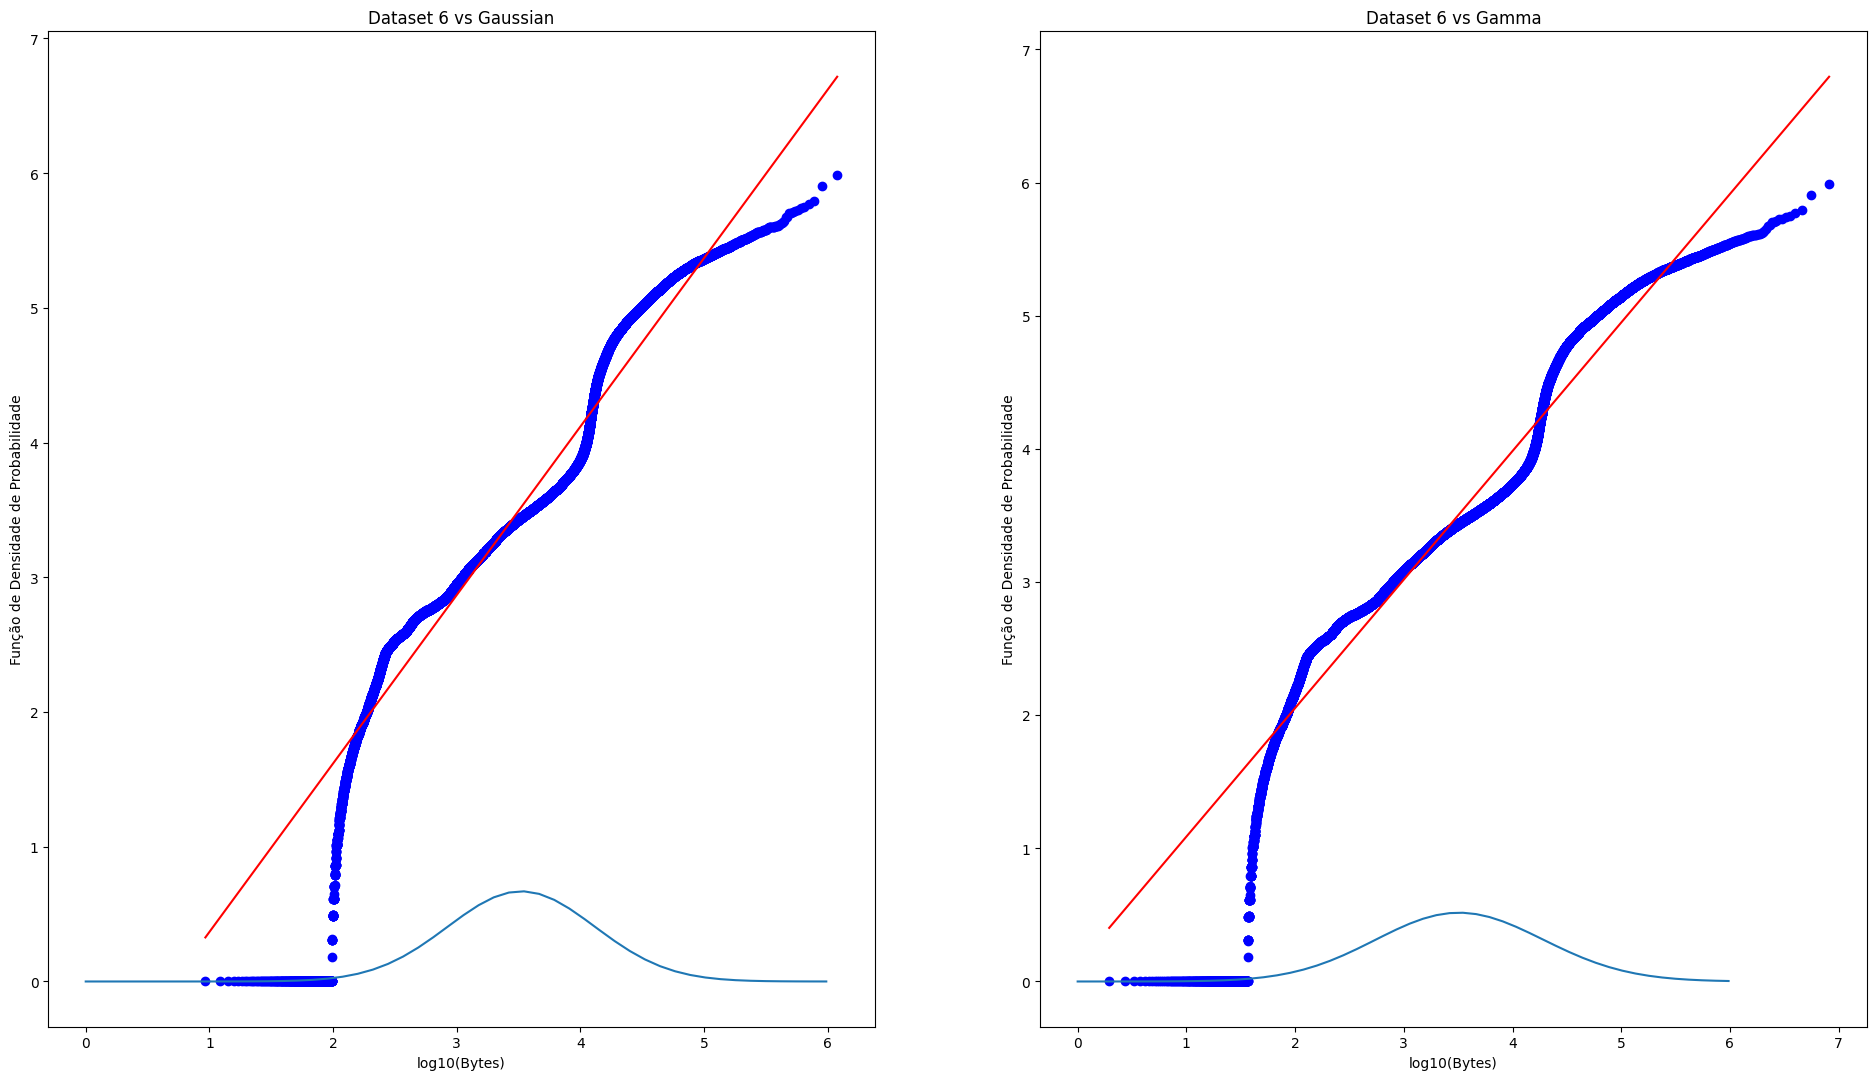

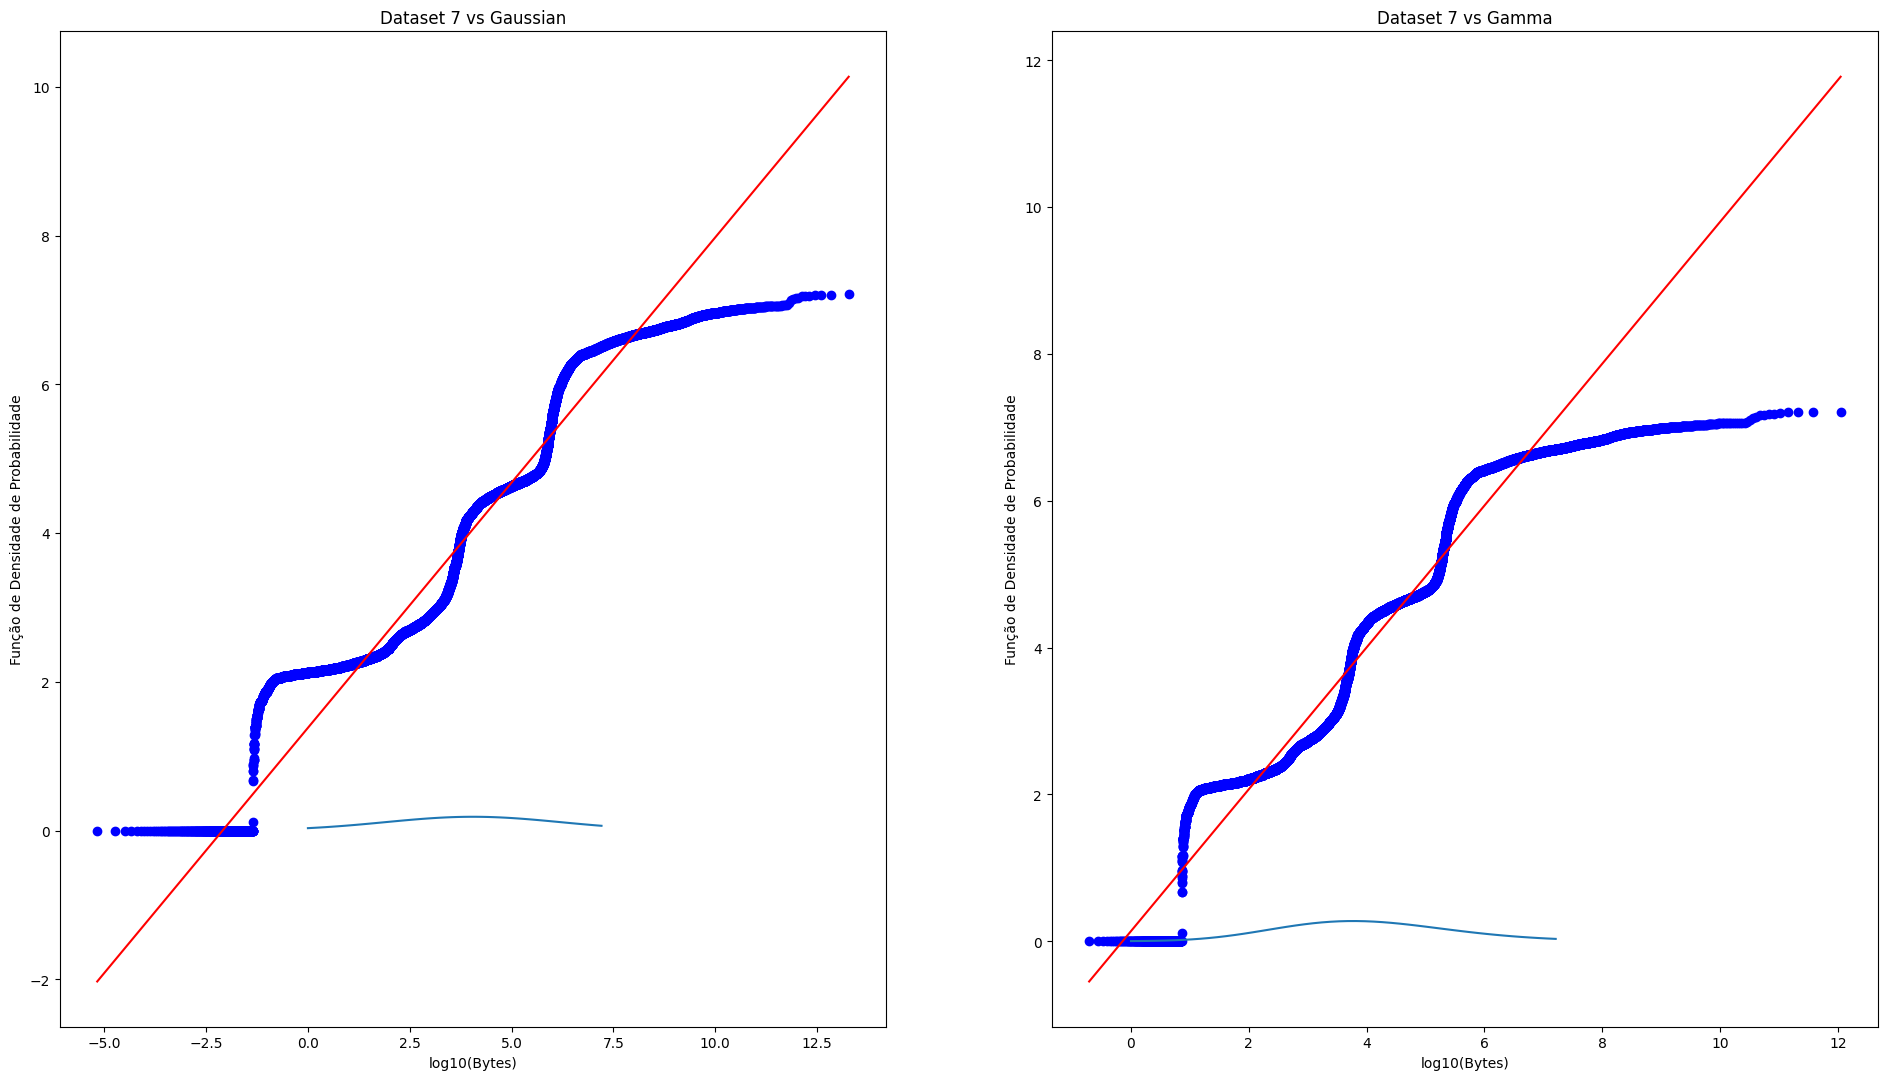

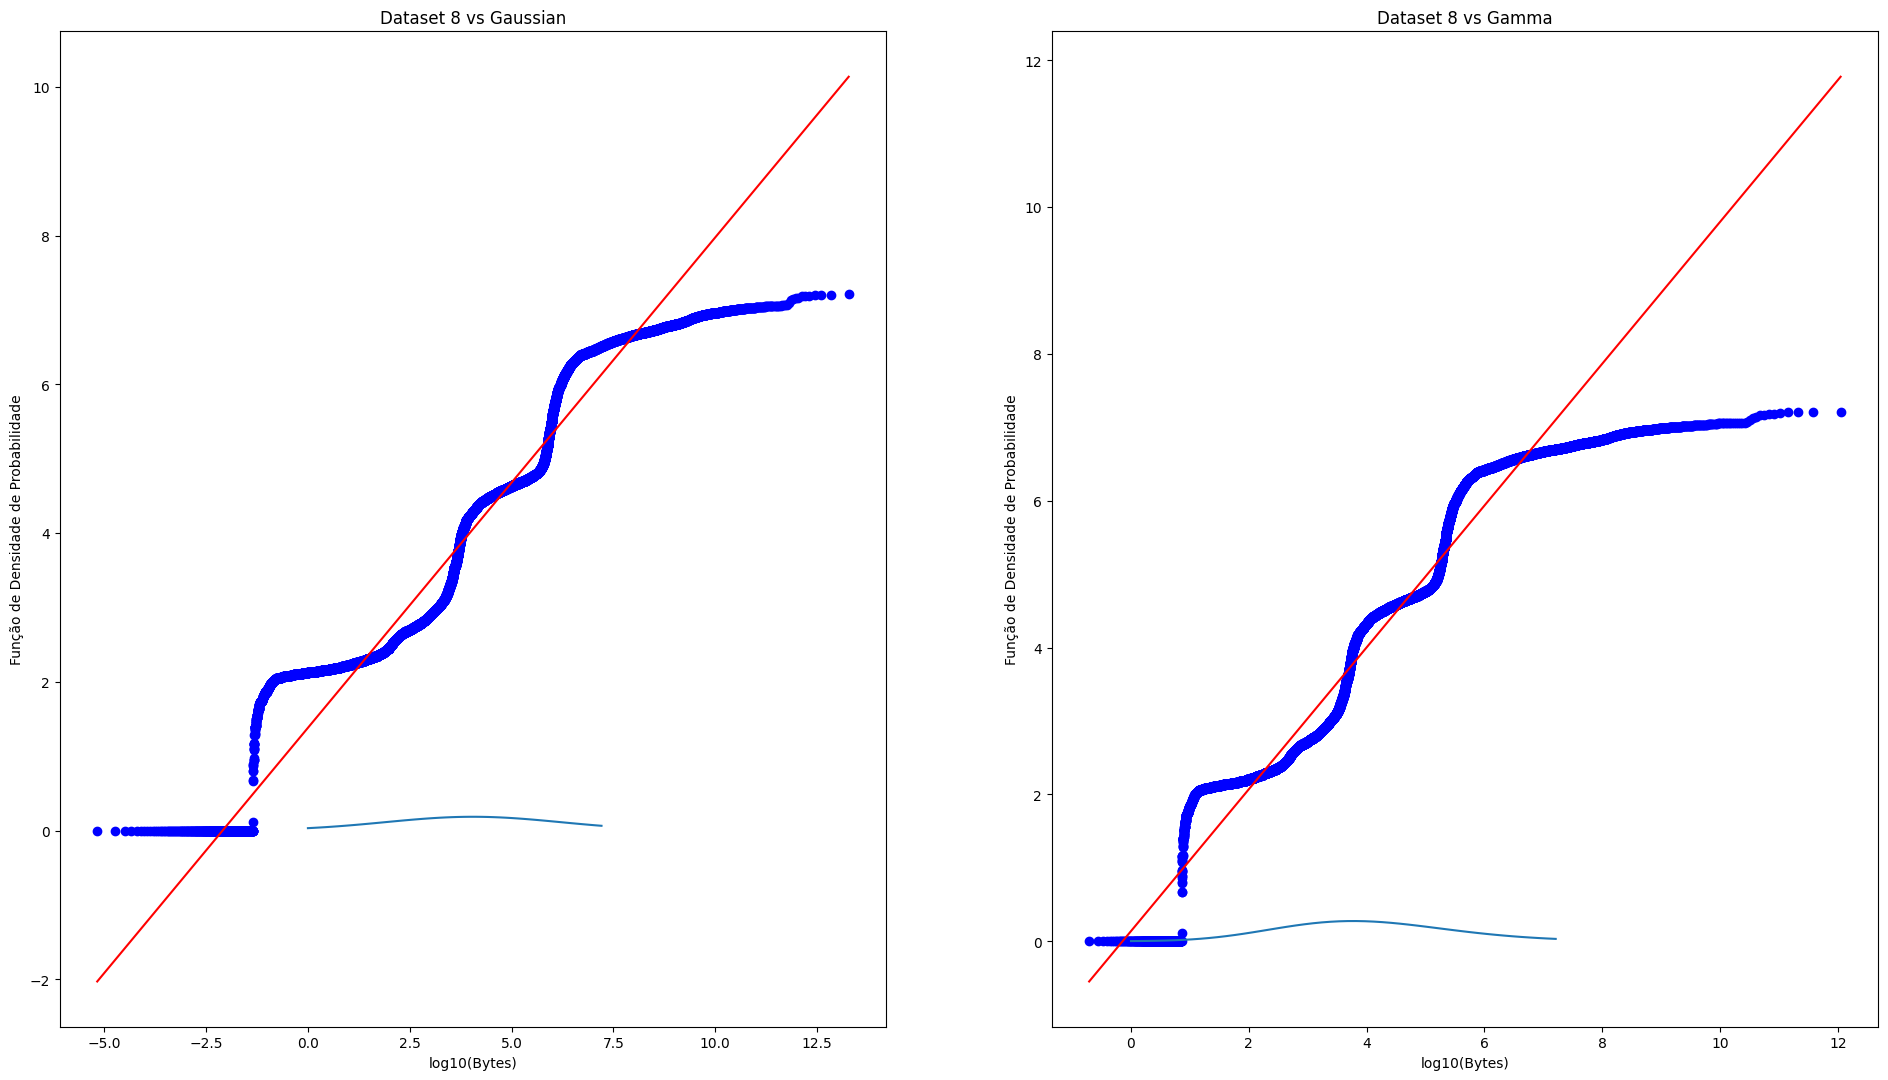

In [31]:
from scipy.stats import probplot

for i, data in enumerate(datasets):
    fig, ax = plt.subplots(1, 2, figsize=(23.465, 12.925))
    
    probplot(data, dist=norm(*mle_gaussian[i]), plot=ax[0])
    ax[0].set_title(f"Dataset {i+1} vs Gaussian")
    ax[0].set_xlabel('log10(Bytes)')
    ax[0].set_ylabel("Função de Densidade de Probabilidade")
    x = np.linspace(min(data), max(data))
    ax[0].plot(x, norm.pdf(x, *mle_gaussian[i]))

    probplot(data, dist=gamma(*mle_gamma[i]), plot=ax[1])
    ax[1].set_title(f"Dataset {i+1} vs Gamma")
    ax[1].set_xlabel('log10(Bytes)')
    ax[1].set_ylabel("Função de Densidade de Probabilidade")
    ax[1].plot(x, gamma.pdf(x, *mle_gamma[i]))
    
    plt.show()

# Correlation Stats in Hours with More Traffic

## Correlation of Datasets

In [32]:
new_dataset_5 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_down"].median().argmax()]["bytes_up"]
new_dataset_6 = df_chromecast[df_chromecast['date_hour'] == df_chromecast.groupby(
    "date_hour")["bytes_down"].mean().argmax()]["bytes_up"]

corr_1_3 = dataset_1.corr(dataset_3)
corr_2_4 = dataset_2.corr(dataset_4)
corr_5_7 = new_dataset_5.corr(dataset_7)
corr_6_8 = new_dataset_6.corr(dataset_8)

corr_1_3, corr_2_4, corr_5_7, corr_6_8

(0.9156089964784166,
 0.9156089964784166,
 0.7925043015217009,
 0.7925043015217009)

## Scatter Plots of Datasets

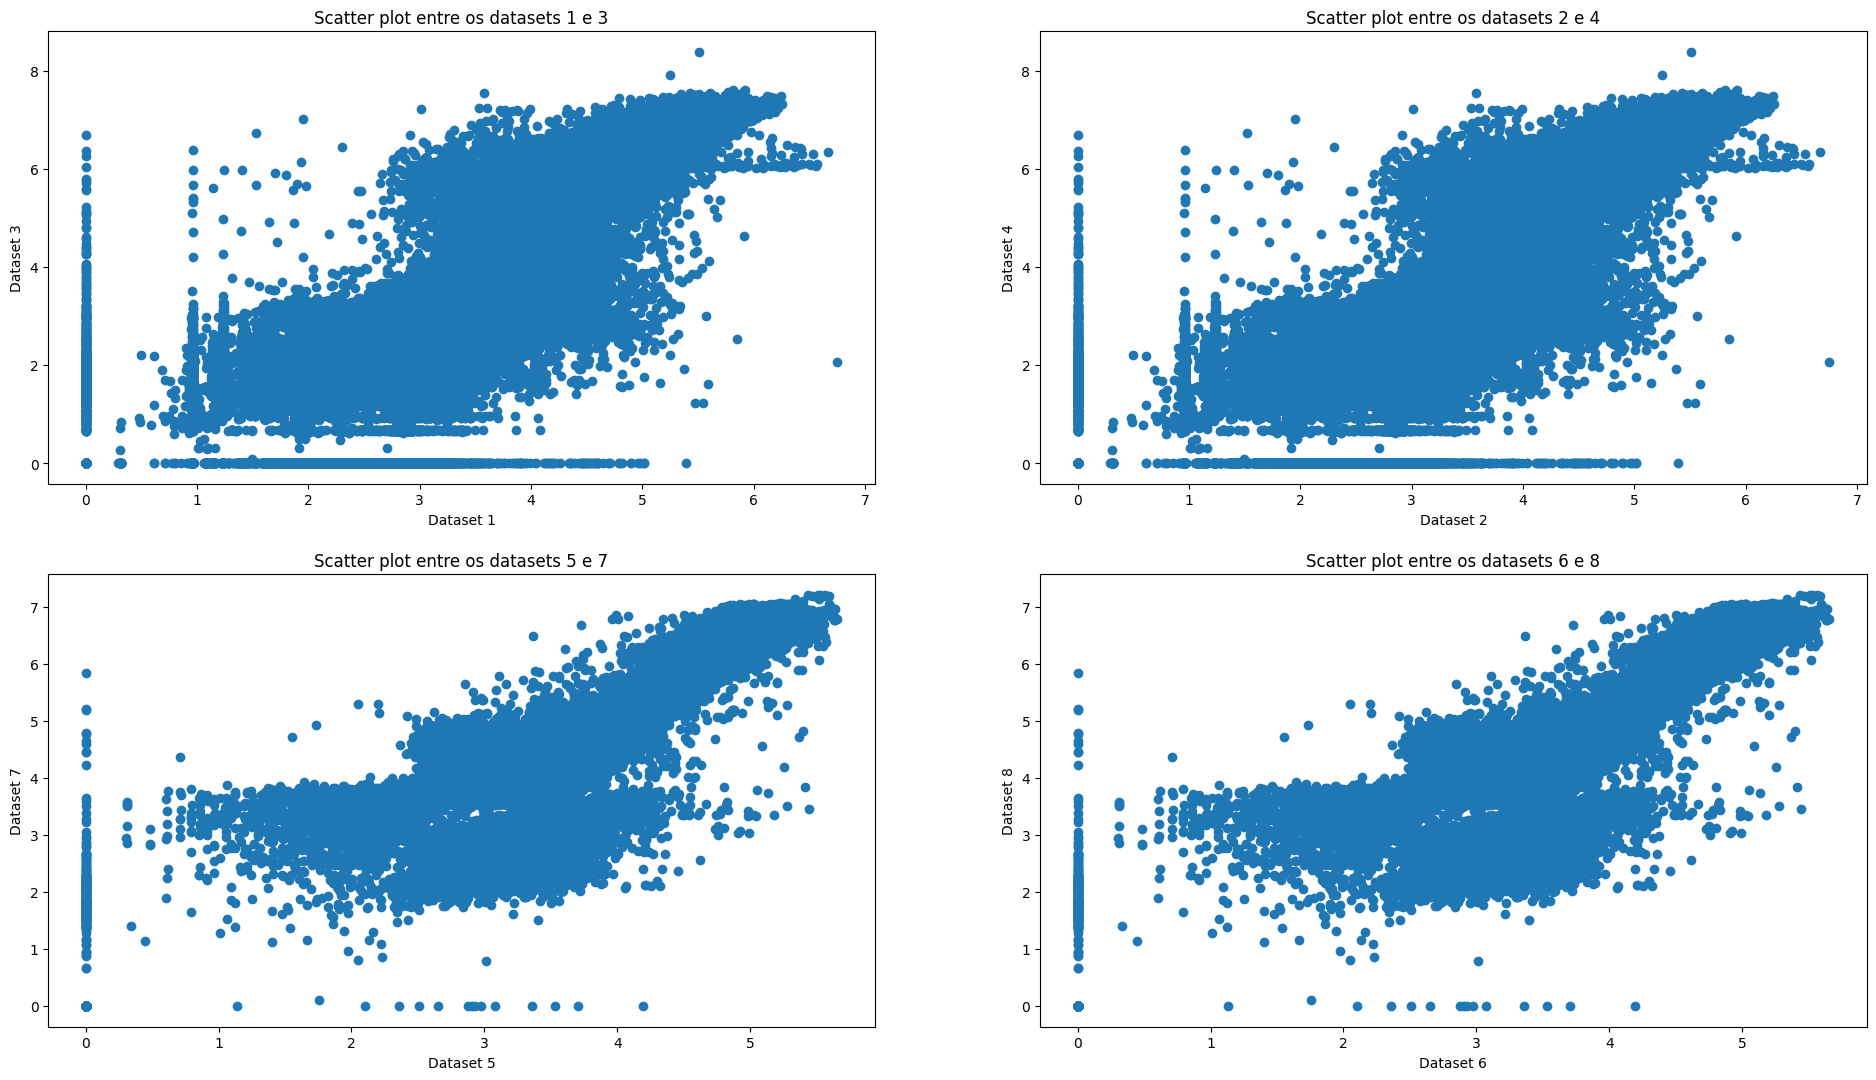

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

ax[0][0].scatter(dataset_1, dataset_3)
ax[0][0].set_title('Scatter plot entre os datasets 1 e 3')
ax[0][0].set_xlabel("Dataset 1")
ax[0][0].set_ylabel("Dataset 3")

ax[0][1].scatter(dataset_2, dataset_4)
ax[0][1].set_title('Scatter plot entre os datasets 2 e 4')
ax[0][1].set_xlabel("Dataset 2")
ax[0][1].set_ylabel("Dataset 4")

ax[1][0].scatter(new_dataset_5, dataset_7)
ax[1][0].set_title('Scatter plot entre os datasets 5 e 7')
ax[1][0].set_xlabel("Dataset 5")
ax[1][0].set_ylabel("Dataset 7")

ax[1][1].scatter(new_dataset_6, dataset_8)
ax[1][1].set_title('Scatter plot entre os datasets 6 e 8')
ax[1][1].set_xlabel("Dataset 6")
ax[1][1].set_ylabel("Dataset 8")

plt.show()


# Comparation between Devices

In [52]:
from scipy.stats import power_divergence


def segment_data(series, num_bins):
    """
    Segments the data from a Pandas Series into bin intervals using the `cut` function.

    Parameters:
        series (pandas.Series): The Pandas Series to segment.
        num_bins (int): The number of bins to generate.

    Returns:
        pandas.DataFrame: A new DataFrame with the segment counts and bin intervals.
    """
    segments = pd.cut(series, bins=num_bins, labels=False)

    segment_counts = segments.groupby(segments).count()

    bin_edges = pd.Series(
        pd.cut(series, bins=num_bins, retbins=True)[1]
    )

    bin_width = (bin_edges.iloc[1] - bin_edges.iloc[0])
    bin_left = bin_edges.iloc[:-1]
    bin_right = bin_edges.iloc[1:]

    segment_data = pd.DataFrame({
        "count": segment_counts,
        "bin_left": bin_left,
        "bin_right": bin_right
    })

    return segment_data


g_statistic, p_value = power_divergence(
    segment_data(dataset_1, 19),
    segment_data(dataset_5, 19),
    lambda_='log-likelihood')

g_statistic, p_value


(array([nan, nan, nan]), array([nan, nan, nan]))

# Conclution